# Bab 1: Introduction

Nama: Allen

Batch: FTDS_BSD_003

Dataset: `credit-card-information`

Problem Statement:
Pada project kali ini akan mengetahui tentang  informasi penggunaan kartu kredit selama 6 bulan terakhir tujuannya adalah bagaimana kita bisa mengcluster atau mengelompokkan aktivitas kartu kredit pengguna kedalam kelompok-kelompok agar pihak instansi atau marketing mengetahui targetnya dengan tepat 

# Bab 2: Query SQL

In [1]:
'''
SELECT * 
FROM `ftds-hacktiv8-project.phase1_ftds_003_bsd.credit-card-information` 
WHERE MOD(CUST_ID, 2) <> 0
LIMIT 5000
'''

'\nSELECT * \nFROM `ftds-hacktiv8-project.phase1_ftds_003_bsd.credit-card-information` \nWHERE MOD(CUST_ID, 2) <> 0\nLIMIT 5000\n'

# Bab 3: Import Libraries

In [2]:
# Import Library
import numpy as np
import pandas as pd
import pickle
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from feature_engine.outliers import Winsorizer
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.graph_objects as go

# Bab 4: Data Loading

In [3]:
#Untuk mengeload data set
df_ori=pd.read_csv('P1G6_Set_1_Allen.csv')


#Membuat Duplicate df_ori
df=df_ori.copy()

#Tampilkan 10 data ter atas
df.head(10)

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3091    3.833185           0.125000      45.00             45.00   
1     5069    0.000000           0.000000     176.03            176.03   
2     6075  757.964752           0.875000     157.40            157.40   
3     6291  264.566591           0.375000    1150.00           1150.00   
4     7755  440.613643           1.000000     600.00            600.00   
5     8299  611.561026           1.000000     765.00            765.00   
6     8629    0.228572           0.125000      60.00             60.00   
7     8805  105.333584           0.375000     306.00            306.00   
8        7   16.379412           0.454545     178.15              0.00   
9       91  559.151424           1.000000      94.00             94.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00           0.0                0.125   
1                    0.00           0.0                0.125   
2                    0.00           0.0                0.125   
3                    0.00           0.0                0.125   
4                    0.00           0.0                0.125   
5                    0.00           0.0                0.125   
6                    0.00           0.0                0.125   
7                    0.00           0.0                0.125   
8                  178.15           0.0                0.250   
9                    0.00           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                              0.00   
1                       0.125                              0.00   
2                       0.125                              0.00   
3                       0.125                              0.00   
4                       0.125                              0.00   
5                       0.125                              0.00   
6                       0.125                              0.00   
7                       0.125                              0.00   
8                       0.000                              0.25   
9                       0.250                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   
5                     0.0                 0              1        2000.0   
6                     0.0                 0              1        1500.0   
7                     0.0                 0              2        6000.0   
8                     0.0                 0              3        5000.0   
9                     0.0                 0              3        5500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.000000               NaN          0.000000       8  
1     0.000000               NaN          0.000000       8  
2  1494.480376       2638.598410          0.000000       8  
3  3029.380326         85.428885          0.000000       8  
4   215.316424        137.846006          0.000000       8  
5   204.464151        146.352314          0.000000       8  
6   438.738982               NaN          0.000000       8  
7   101.986927        118.324082          0.000000       8  
8   229.376368         89.613822          0.181818      12  
9   254.733329        218.279194          0.000000      12

Sebelum masuk lebih jauh mari kita bedah satu per satu arti dari setiap kolom untuk memudahkan kita dalam menganalisis dataset mengenai customer credit
1. Balance : jumlah saldo yang tersisa di rekening pelanggan untuk melakukan transaksi
2. Balance Frequency : intensitas berapa sering saldo sering di update
3. Purchases : transaksi atau pembelian yang dilakukan akun customer
4. Oneoff Purchases : jumlah pembelian maksimum yang dilakukan dalam sekali jalan
5. Installment Purchases : jumlah pembelian yang dilaukan secara cicilan atau angsuran
6. Cash Advance : uang tunai dimuka yang diberikan pengguna
7. Purchase Frequency : seberapa sering melakukan transaksi
8. Oneoff Purchase Frequency : seberapa sering melakukan transaksi sekali jalan
9. Purchase Installment Frequency : seberapa sering melakukan pembelian secara angsuran atau cicilan
10. Cash Advance Frequency : seberapa sering uang tunai di bayarkan
11. Cash Advance TRX : jumlah transaksi yang dilakukan menggunakan uang muka
12. Purchase TRX : jumlah transaksi pembelian yang dilakukan
13. Credit Limit : Limit kartu kredit dari pengguna
14. Payments : jumlah pembayaran yang dilakukan pengguna
15. Minimum Payments : jumlah pembayaran minimum yang dilakukan pengguna
16. PRC Full Payment : presentasi pembayaran penuh yang dilakukan pengguna
17. Tenure : kepemilikan layanan kartu kredit pengguna

Setelah mengetahui gambaran besar dari kolom kolom data membantu kita dalam melakukan analisis mengenai dataset customer credit card, mari lanjutkan cleaning dan explorasi data

In [4]:
# Menampilkan 10 data terbawah
df.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     6809  4438.521324           1.000000     591.84            109.16   
4466     7211  1135.703750           1.000000      92.07              0.00   
4467     8295   185.984965           0.454545     482.24            392.24   
4468     8855  3531.167073           0.900000     797.50            577.83   
4469     2389  1917.895730           1.000000     285.07            285.07   
4470     2345  9629.808851           1.000000       0.00              0.00   
4471     6785  1040.030221           1.000000       0.00              0.00   
4472     7347  1322.818587           1.000000       0.00              0.00   
4473     8447  1060.391273           1.000000       0.00              0.00   
4474     1995  3447.674222           1.000000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                  482.68    564.365429             0.636364   
4466                   92.07     81.509491             0.272727   
4467                   90.00    903.843591             0.272727   
4468                  219.67   5273.226918             0.700000   
4469                    0.00   6084.858872             0.363636   
4470                    0.00   4372.393835             0.000000   
4471                    0.00   1390.648290             0.000000   
4472                    0.00    762.301096             0.000000   
4473                    0.00   1475.858013             0.000000   
4474                    0.00   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.181818                          0.454545   
4466                    0.000000                          0.181818   
4467                    0.181818                          0.090909   
4468                    0.400000                          0.500000   
4469                    0.363636                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.000000                          0.000000   
4473                    0.000000                          0.000000   
4474                    0.090909                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 3             11       17000.0   
4466                0.272727                 3              3        1200.0   
4467                0.272727                 8              8        1200.0   
4468                0.900000                33             21        4000.0   
4469                1.090909                28              6        3000.0   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465  5552.601399       1094.486286              0.00      11  
4466   355.798199        434.689529              0.00      11  
4467  2333.997439        160.900585              0.25      11  
4468  2979.546700       3052.080103              0.00      10  
4469  5692.682993        556.449635              0.00      11  
4470  2468.988022       2134.295731              0.00      11  
4471   290.129620        287.994171              0.00      11  
4472  1035.627320        312.835530              0.00      11  
4473   407.360560        277.084736              0.00      11  
4474   665.239171        817.844662              0.00      11

In [5]:
# Cek semua tipe data kolom dan missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [6]:
#Menunjukkan Kolom
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [7]:
#Melihat unique value setiap kolom data
df.nunique()

CUST_ID                             4475
BALANCE                             4433
BALANCE_FREQUENCY                     43
PURCHASES                           3203
ONEOFF_PURCHASES                    2093
INSTALLMENTS_PURCHASES              2292
CASH_ADVANCE                        2169
PURCHASES_FREQUENCY                   46
ONEOFF_PURCHASES_FREQUENCY            45
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                51
CASH_ADVANCE_TRX                      52
PURCHASES_TRX                        150
CREDIT_LIMIT                         158
PAYMENTS                            4362
MINIMUM_PAYMENTS                    4319
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [8]:
# Melihat baris dan kolom
df.shape

(4475, 18)

In [9]:
# Melihat data yang terduplikasi
df.duplicated().sum()

0

In [10]:
# Melihat rangkuman data mean std min median max
df.describe()

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count  4475.000000   4475.000000        4475.000000   4475.000000   
mean   4475.000000   1563.205717           0.876933   1003.251343   
std    2583.931114   2072.045789           0.238222   2060.034730   
min       1.000000      0.000000           0.000000      0.000000   
25%    2238.000000    124.432849           0.888889     39.560000   
50%    4475.000000    871.355430           1.000000    360.000000   
75%    6712.000000   2047.570799           1.000000   1102.420000   
max    8949.000000  18495.558550           1.000000  41050.400000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count       4475.000000             4475.000000   4475.000000   
mean         596.369893              407.110215    984.288554   
std         1653.425984              880.799744   2060.448056   
min            0.000000                0.000000      0.000000   
25%            0.000000                0.000000      0.000000   
50%           45.650000               88.620000      0.000000   
75%          575.220000              455.885000   1138.887754   
max        40624.060000            14686.100000  47137.211760   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          4475.000000                 4475.000000   
mean              0.490579                    0.202301   
std               0.402907                    0.298203   
min               0.000000                    0.000000   
25%               0.083333                    0.000000   
50%               0.500000                    0.083333   
75%               0.916667                    0.250000   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       4475.000000             4475.000000   
mean                           0.363886                0.136132   
std                            0.397603                0.201036   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.166667                0.000000   
75%                            0.750000                0.250000   
max                            1.000000                1.500000   

       CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count       4475.000000    4475.000000   4475.000000   4475.000000   
mean           3.301229      14.929162   4494.878630   1740.075430   
std            7.134727      25.540814   3609.267706   2827.633858   
min            0.000000       0.000000     50.000000      0.000000   
25%            0.000000       1.000000   1600.000000    376.913051   
50%            0.000000       7.000000   3000.000000    877.494612   
75%            4.000000      17.000000   6500.000000   1911.596530   
max          123.000000     347.000000  30000.000000  50721.483360   

       MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count       4320.000000       4475.000000  4475.000000  
mean         873.976757          0.150224    11.518212  
std         2436.877272          0.289081     1.328925  
min            0.019163          0.000000     6.000000  
25%          168.590144          0.000000    12.000000  
50%          313.980229          0.000000    12.000000  
75%          819.371080          0.125000    12.000000  
max        76406.207520          1.000000    12.000000

---

# Bab 5: Data Exploratory

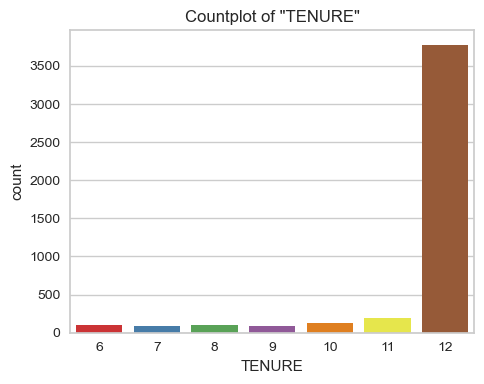

In [11]:
# Menampilkan visualisasi dari kolom tenure
plt.figure(figsize=(5,4))

sns.countplot(data=df, x='TENURE', palette='Set1')
plt.title('Countplot of "TENURE"')

plt.tight_layout()
plt.show()

Dari informasi di atas diperoleh data dimana tenure yang berkaitan dengan hak kepemilikan kartu kredit pengguna yang biasanya di indikasikan dalam kisaran bulan mengindikasin bahwa pelanggan yang memiliki loyalty atau mempunyai kepemilikan kartu kredit selama 12 bulan menduduki peringkat tertinggi dengan sebanyak 3500 orang

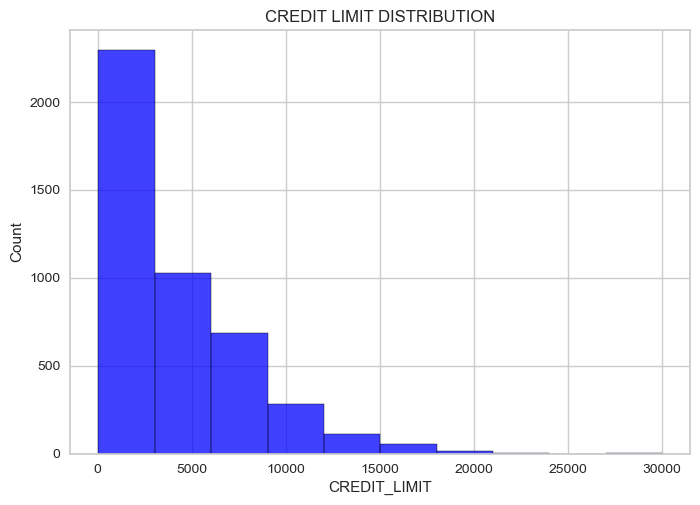

In [12]:
#Visualisasi data distribusi credit limit
sns.histplot(df.CREDIT_LIMIT, bins=10, color='BLUE')
plt.title("CREDIT LIMIT DISTRIBUTION")
plt.show()

Pada informasi di atas kita mendapatkan informasi mengenai persebaran data kolom credit limit customer dimana bank atau perusahaan mengeluarkan kredit limit atau batasan pinjaman di bawah `5000` menduduki peringkat tertinggi yaitu sebanyak `2000` customer, setelahnya diikuti banyaknya limit credit sebanyak `5000`, dibawah `10.000`, `10.000`, dibawah `20.000` dan sebanyak `20.000` dari data row kita mendapatkan insight bahwa cutomer atau pengguna kartu kredit pada bank atau instansi penyedia jasa ini memiliki record negatif dari segi pendapatan, riwayat kredit, jumlah peminjaman, dan masih banyak lagi faktor yang mempengaruhi bank untuk tidak berani mengambil resiko dalam memberikan pinjaman.

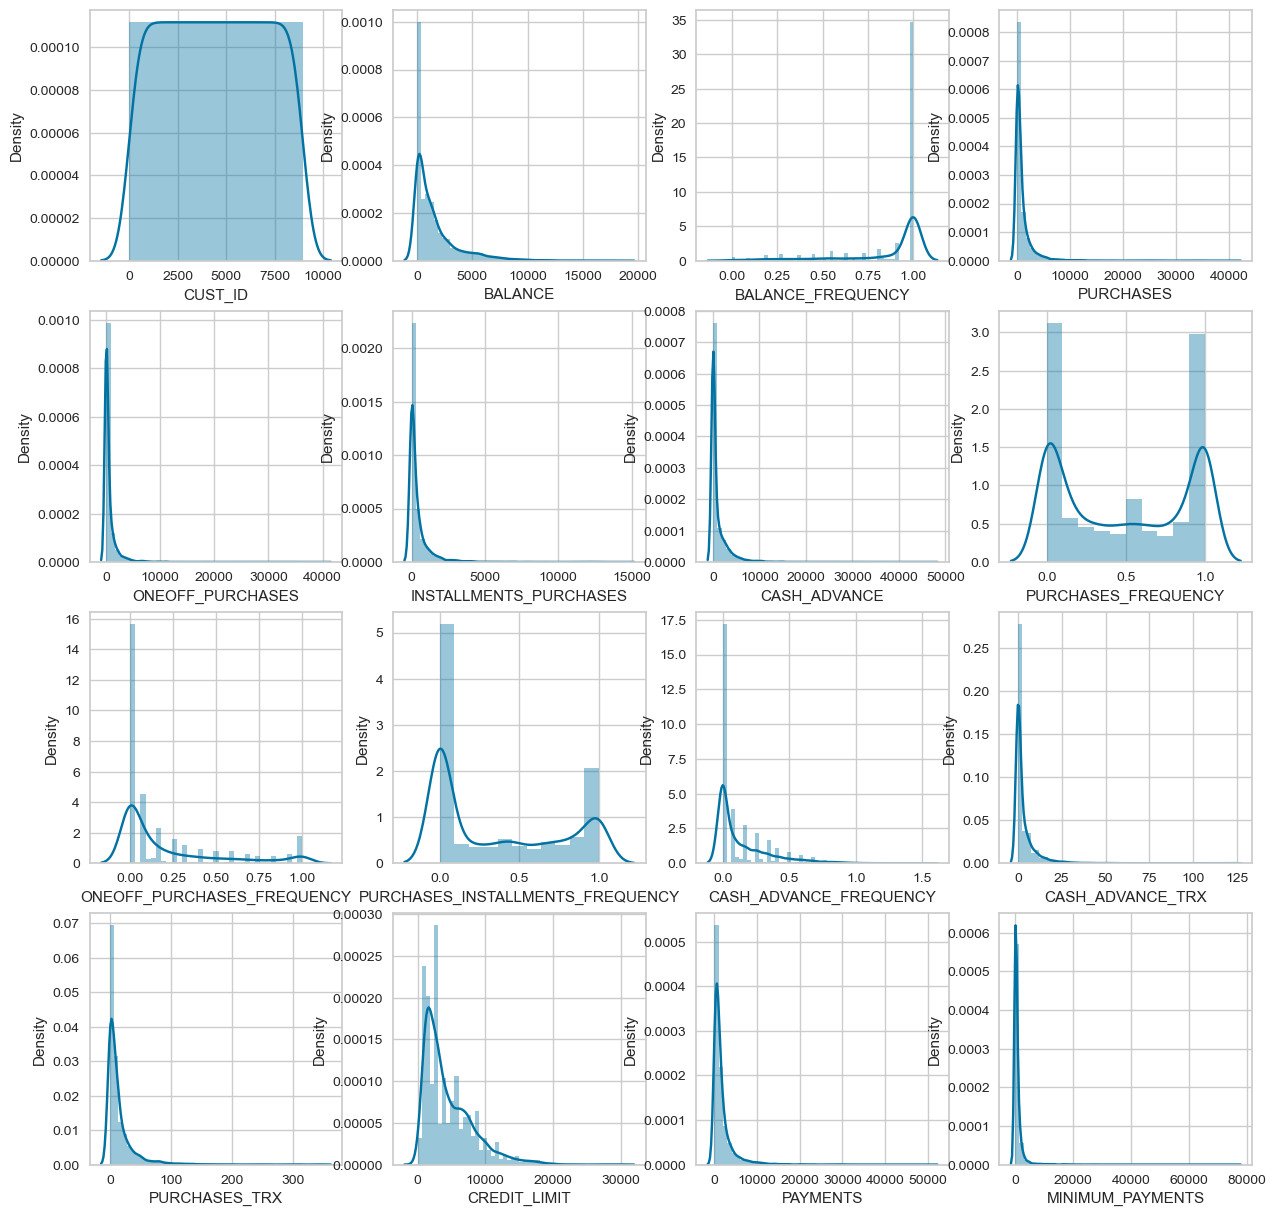

In [13]:
#Menampilkan visualisasi setiap data kolom sebelum dilakukannya clustering
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
for i in range(4):
    for j in range(4):
        sns.distplot(df[df.columns[4 * i + j]], ax=axs[i,j])
plt.show()

Menampilkan semua visualisasi data kolom pada data sebelum adanya clustering

Dari data diatas kita mendapatkan informasi mengenai tingkat pendidikan yang berpengaruh pada pembayaran utang dan mempengaruhi limit balance, semakin rendah pendidikan ternyata mempengaruhi tingkat utang

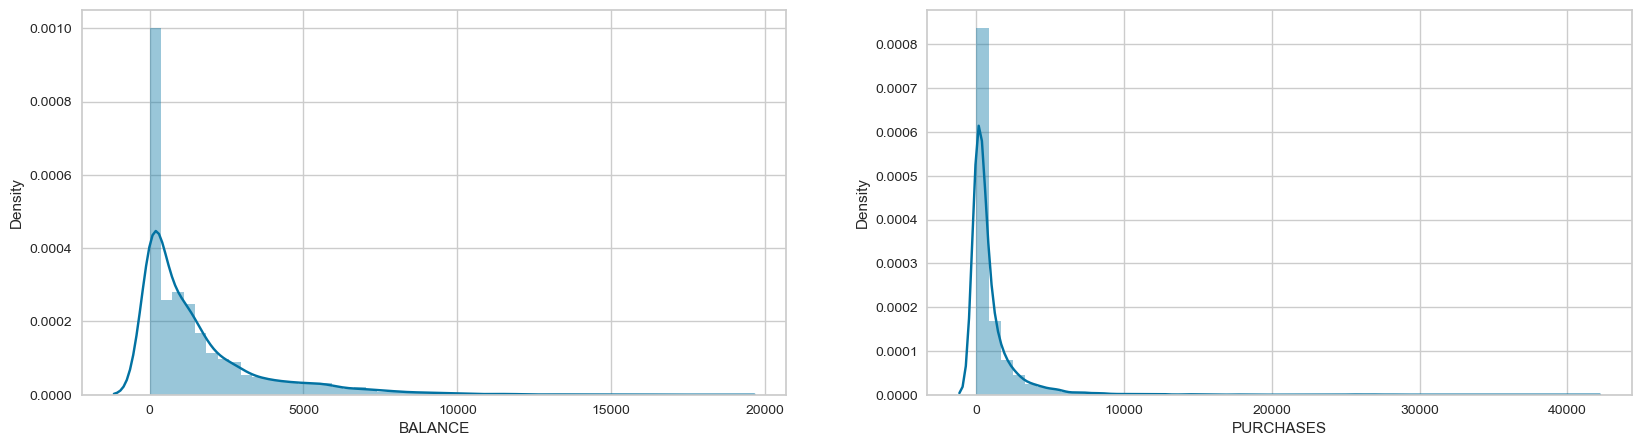

In [14]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.BALANCE)

plt.subplot(122)
sns.distplot(df.PURCHASES)

plt.show()

Dari data di atas kita mendapatkan informasi bahwa density untuk pengguna kartu credit lebih banyak melakukan transaksi atau pembelian yang dapat dilihat dari kolom `purchases` yang lebih tinggi dibandingkan `balance`.

---

# Bab 6: Data Preprocessing/Feature Engineering

Pada tahapan ini yang akan kita lakukan adalah checking and handling missing value, outlier, dan juga akan melakukan scaling sebelum memasuki tahapan PCA

### Checking and Handling Missing Value

In [15]:
# Melihat data null 
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [16]:
#Untuk melihat alasan data NaN pada kolom minimum payment
df[df.MINIMUM_PAYMENTS .isnull()].head(20)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       3091     3.833185           0.125000      45.00             45.00   
1       5069     0.000000           0.000000     176.03            176.03   
6       8629     0.228572           0.125000      60.00             60.00   
21       883  1464.324632           1.000000    1174.39           1174.39   
25      1173    16.887571           0.363636    1083.00           1083.00   
31      1711     0.000000           0.000000       9.28              0.00   
79      6573     0.000000           0.000000      63.30              0.00   
83      6863    10.684577           0.181818     300.00              0.00   
100     8211     0.000000           0.000000      37.65              0.00   
156     3115    24.297113           0.636364     230.47              0.00   
200     6517     0.000000           0.000000     120.82              0.00   
260     2509   144.080651           1.000000    1526.54           1005.69   
296     6425     0.000000           0.000000     269.28              0.00   
304     7065     0.000000           0.000000     933.75              0.00   
306     7233     0.000000           0.000000     199.88              0.00   
351      221     0.000000           0.000000     140.04              0.00   
382      565    19.183215           1.000000     300.00              0.00   
432     1217  1110.575152           1.000000    3384.68           2344.28   
449     1427  1374.460976           1.000000    1990.81              0.00   
471     1701     0.000000           0.000000     110.40              0.00   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      0.00           0.0                0.125   
1                      0.00           0.0                0.125   
6                      0.00           0.0                0.125   
21                     0.00           0.0                0.250   
25                     0.00           0.0                0.250   
31                     9.28           0.0                0.250   
79                    63.30           0.0                0.250   
83                   300.00           0.0                0.250   
100                   37.65           0.0                0.250   
156                  230.47           0.0                0.500   
200                  120.82           0.0                0.500   
260                  520.85           0.0                0.750   
296                  269.28           0.0                0.750   
304                  933.75           0.0                0.750   
306                  199.88           0.0                0.750   
351                  140.04           0.0                1.000   
382                  300.00           0.0                1.000   
432                 1040.40           0.0                1.000   
449                 1990.81           0.0                1.000   
471                  110.40           0.0                1.000   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      0.125000                          0.000000   
1                      0.125000                          0.000000   
6                      0.125000                          0.000000   
21                     0.250000                          0.000000   
25                     0.250000                          0.000000   
31                     0.000000                          0.250000   
79                     0.000000                          0.250000   
83                     0.000000                          0.250000   
100                    0.000000                          0.250000   
156                    0.000000                          0.500000   
200                    0.000000                          0.500000   
260                    0.250000                          0.500000   
296                    0.000000                          0.750000   
304                    0.000000   

dapat disimpulkan dari data di atas mekanisme data hilangnya merupaka `MAR(Missing At Random)` yaitu data yang hilang merupakan data acak dan tidak terpengaruh karena faktor tertentu yang dibuktikan dengan setiap baris yang memiliki nilai Nan tidak ada kaitanya dengan kolom lain yang dapat mempengaruhi kolom `minimum_payment` memiliki nilai Nan. Pada kasus MAR tidak menjadi masalah atau langkah yang aman untuk kita mengedrop atau menghilangkan missing value tanpa harus imputing nilai nya menjadi `0` atau imputing menggunakan `median`. langkah selanjutnya adalah mari kita hapus missing value nya

In [17]:
# #Mari kita hapus missing value atau null 
df.dropna(subset=['MINIMUM_PAYMENTS'], inplace= True)

In [18]:
#Untuk memastikan sudah tidak ada missing value
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [19]:
# Untuk melihat ada berapa baris setelah droping missing value
df.shape

(4320, 18)

Tahapan selanjutnya adalah feature selection atau menghapus kolom kategrikal pada data serta checking dan handling outlier pada data. Tahapan selanjutnya adalah melakukan feature scaling

In [20]:
df= df.drop(['TENURE'], axis = 1)

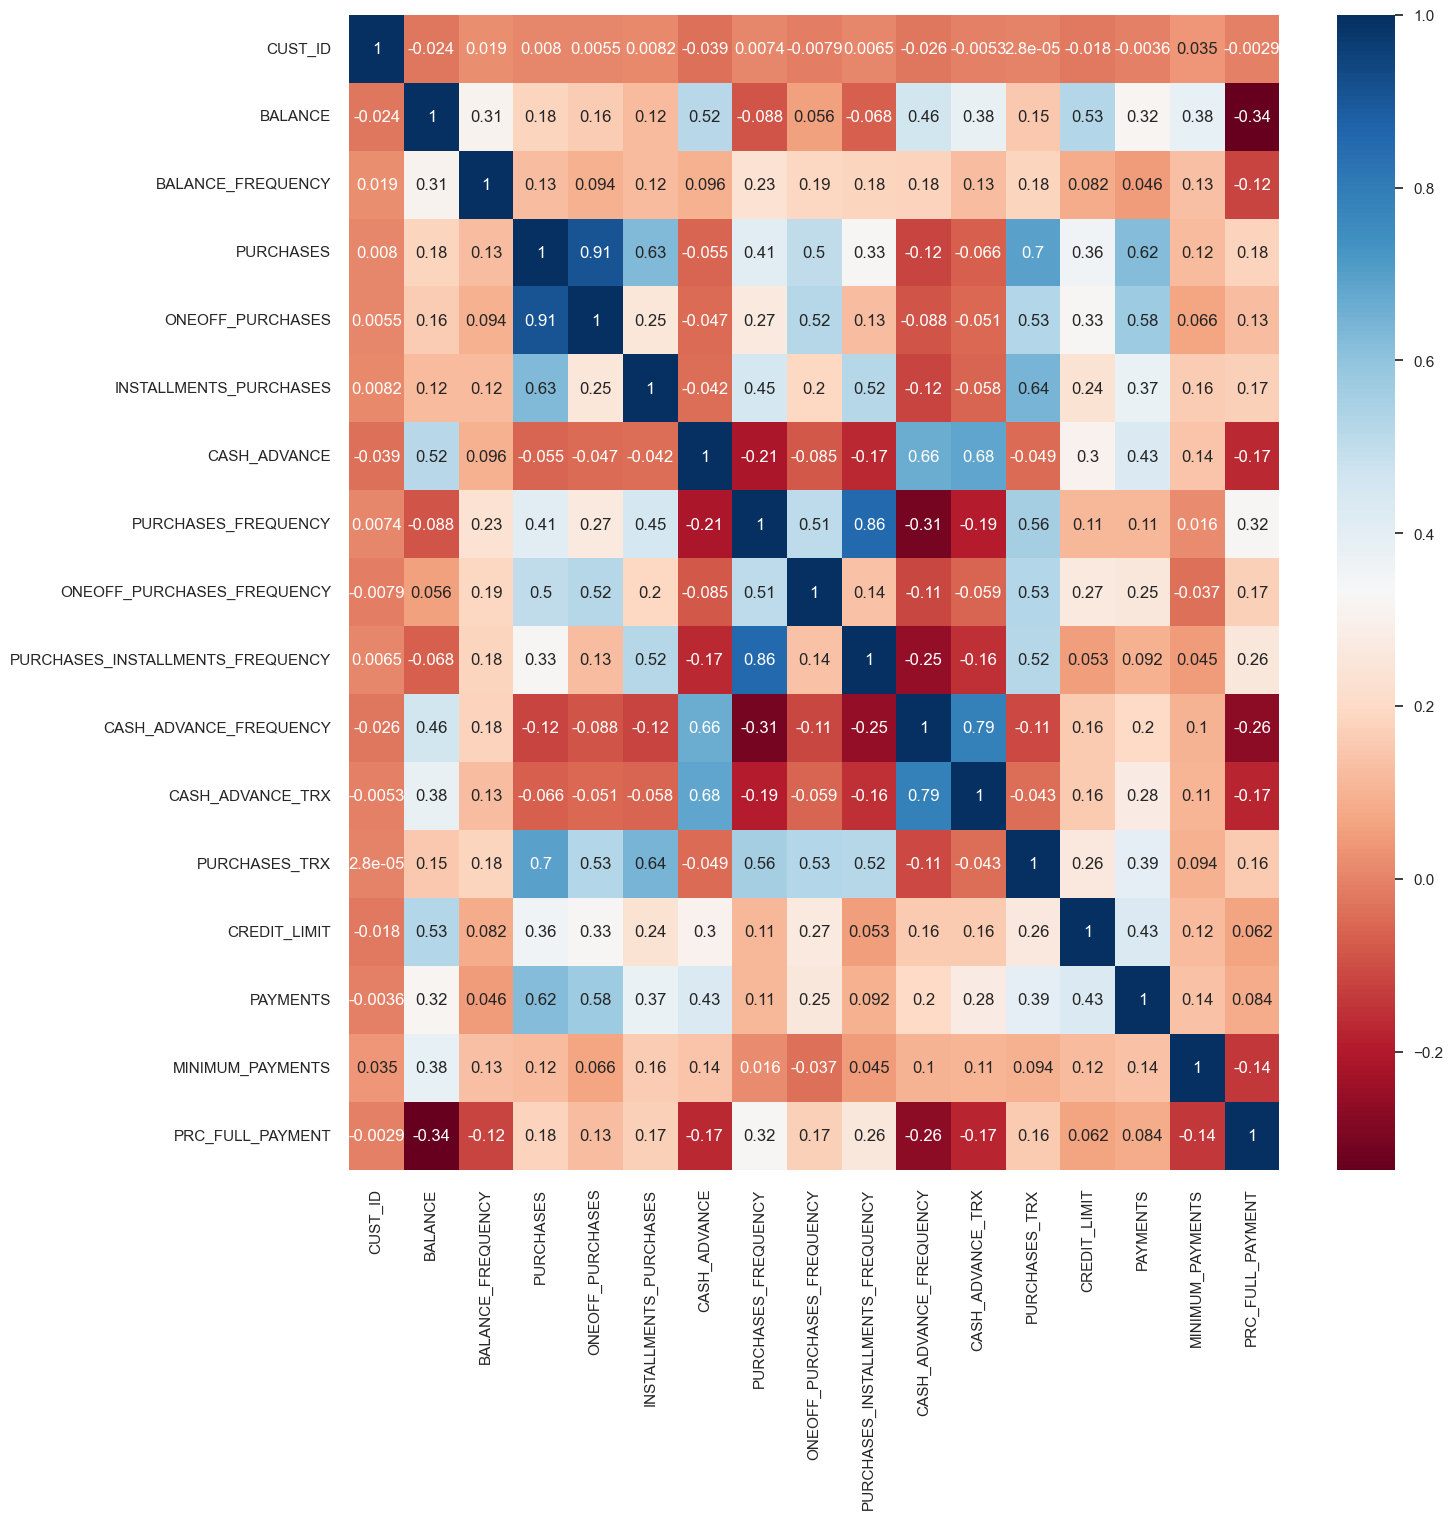

['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY']

In [21]:
# Visualisasi korelasi antar kolom
def high_correlated_cols(dataframe, plot=False, corr_th=0.80):
    # Select only the numeric columns from the DataFrame
    numeric_dataframe = dataframe.select_dtypes(include=['number'])
    
    corr = numeric_dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu",annot=True)
        plt.show()
    
    return drop_list

# pemanggilan function:
high_correlated_cols(df, plot=True)

### Checking and Handling Outlier

In [22]:
# Function untuk membuat histogram dan boxplot
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

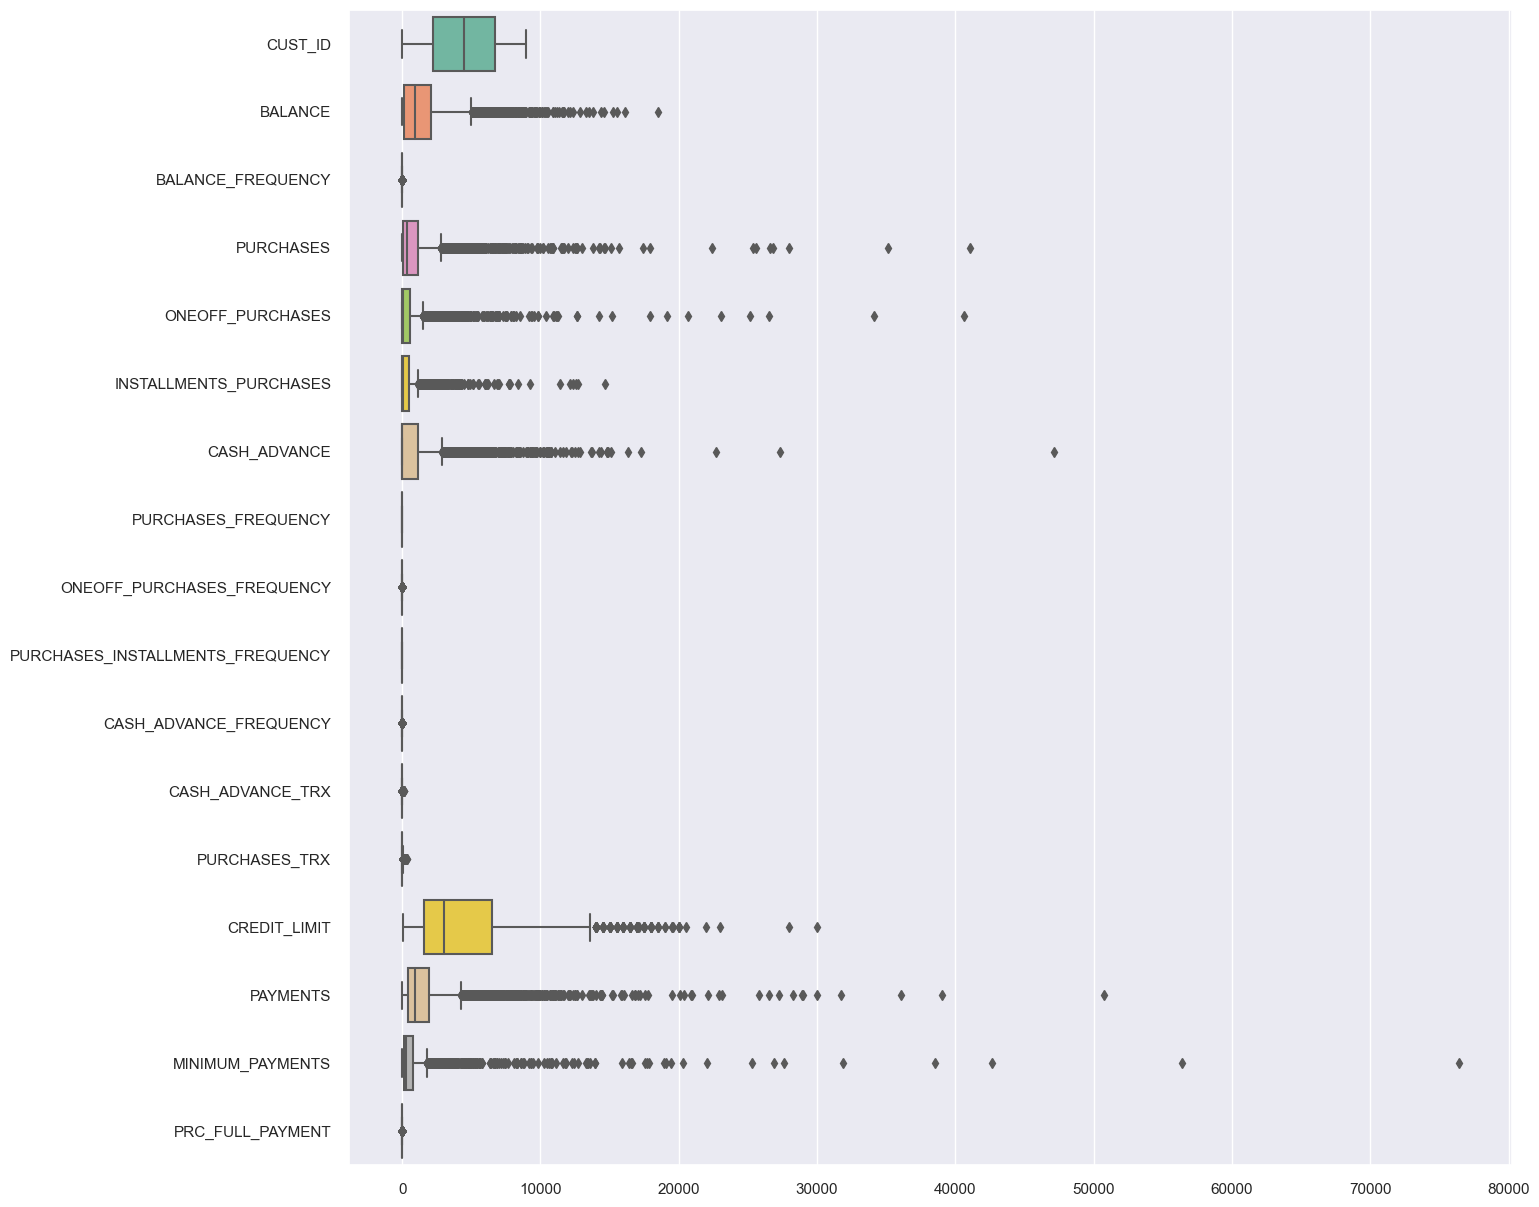

In [23]:
# visualizing outliers
ax = sns.boxplot(data=df, orient="h", palette="Set2")

In [24]:
# Memastikan data skewness melalui angka
print('Distribution of column `CUST_ID`  : ', df['CUST_ID'].skew())
print('Distribution of column `BALANCE`  : ', df['BALANCE'].skew())
print('Distribution of column `BALANCE_FREQUENCY`  : ', df['BALANCE_FREQUENCY'].skew())
print('Distribution of column `PURCHASES` : ', df['PURCHASES'].skew())
print('Distribution of column `ONEOFF_PURCHASES` : ', df['ONEOFF_PURCHASES'].skew())
print('Distribution of column `INSTALLMENTS_PURCHASES` : ', df['INSTALLMENTS_PURCHASES'].skew())
print('Distribution of column `CASH_ADVANCE` : ', df['CASH_ADVANCE'].skew())
print('Distribution of column `PURCHASES_FREQUENCY`  : ', df['PURCHASES_FREQUENCY'].skew())
print('Distribution of column `ONEOFF_PURCHASES_FREQUENCY`  : ', df['ONEOFF_PURCHASES_FREQUENCY'].skew())
print('Distribution of column `PURCHASES_INSTALLMENTS_FREQUENCY`  : ', df['PURCHASES_INSTALLMENTS_FREQUENCY'].skew())
print('Distribution of column `CASH_ADVANCE_TRX`  : ', df['CASH_ADVANCE_TRX'].skew())
print('Distribution of column `PURCHASES_TRX`  : ', df['PURCHASES_TRX'].skew())
print('Distribution of column `CREDIT_LIMIT` : ', df['CREDIT_LIMIT'].skew())
print('Distribution of column `PAYMENTS` : ', df['PAYMENTS'].skew())
print('Distribution of column `MINIMUM_PAYMENTS` : ', df['MINIMUM_PAYMENTS'].skew())
print('Distribution of column `PRC_FULL_PAYMENT`  : ', df['PRC_FULL_PAYMENT'].skew())

Distribution of column `CUST_ID`  :  -0.000909576000153484
Distribution of column `BALANCE`  :  2.3060560083334405
Distribution of column `BALANCE_FREQUENCY`  :  -2.085655942874467
Distribution of column `PURCHASES` :  6.982698043897626
Distribution of column `ONEOFF_PURCHASES` :  9.827307004944023
Distribution of column `INSTALLMENTS_PURCHASES` :  6.252820447484483
Distribution of column `CASH_ADVANCE` :  5.611537241356356
Distribution of column `PURCHASES_FREQUENCY`  :  0.030477479947374164
Distribution of column `ONEOFF_PURCHASES_FREQUENCY`  :  1.5142430379734177
Distribution of column `PURCHASES_INSTALLMENTS_FREQUENCY`  :  0.4891007516065457
Distribution of column `CASH_ADVANCE_TRX`  :  6.352409253171002
Distribution of column `PURCHASES_TRX`  :  4.694066710265747
Distribution of column `CREDIT_LIMIT` :  1.487940822693631
Distribution of column `PAYMENTS` :  5.720098998110234
Distribution of column `MINIMUM_PAYMENTS` :  14.669771084332641
Distribution of column `PRC_FULL_PAYMENT`  

Untuk Data yang memiliki distribusi normal memiliki skewwness diantara `-0.5` dan `0.5` sehingga data yang melampaui batasan tersebut bisa di katakan data skew atau memiliki outlier sehingga dapat disimpulkan hanya 2 kolom yang distribusinya normal yang akan kita caping juga menggunakan metode capping `GAUSIAN` yaitu kolom `PURCHASES_FREQUENCY` dan `PURCHASES_INSTALLMENTS_FREQUENCY`, untuk kolom lainnya yang memiliki outlier kita harus menggunakan metode capping `IQR` untuk handling outlier. Alasan dilakukan capping outlier pada data karena feature yang kita miliki sangat sedikit sehingga kita tidak mau menghapus feature apapun dengan handling outlier menggunakan capping memiliki keuntungan yaitu tidak perlu untuk menghapus feature apapun dalam data kita

In [25]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'],
      dtype='object')

In [26]:
# capping distribusi data normal

winsoriser_normal = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=1.5,
                            variables=['PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CUST_ID'],
                            missing_values='ignore')

df_capped = winsoriser_normal.fit_transform(df)

In [27]:
# Capping distribusi data skew

winsoriser_skew = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=1.5,
                             variables=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
                                        'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 
                                        'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX','CREDIT_LIMIT', 
                                        'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])

df_capped = winsoriser_skew.fit_transform(df_capped)

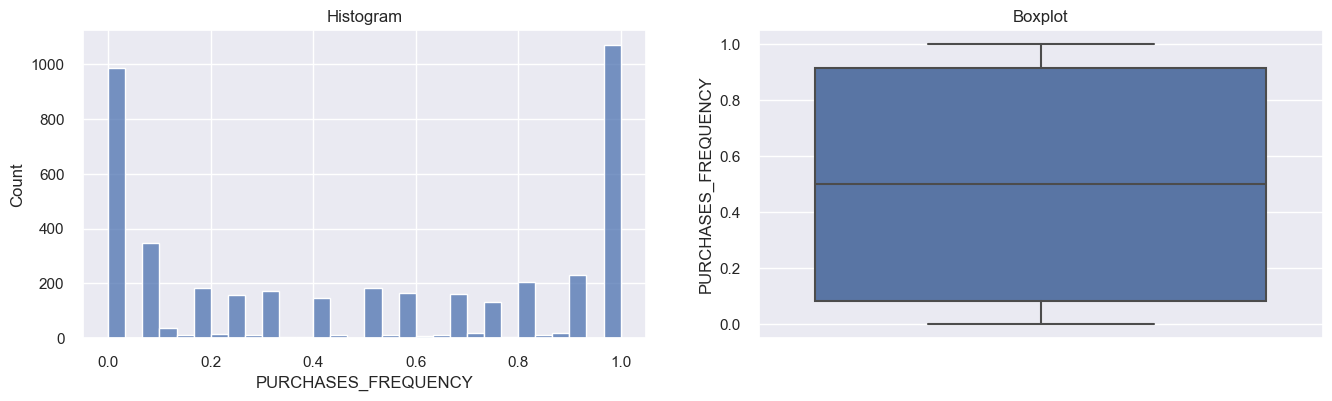

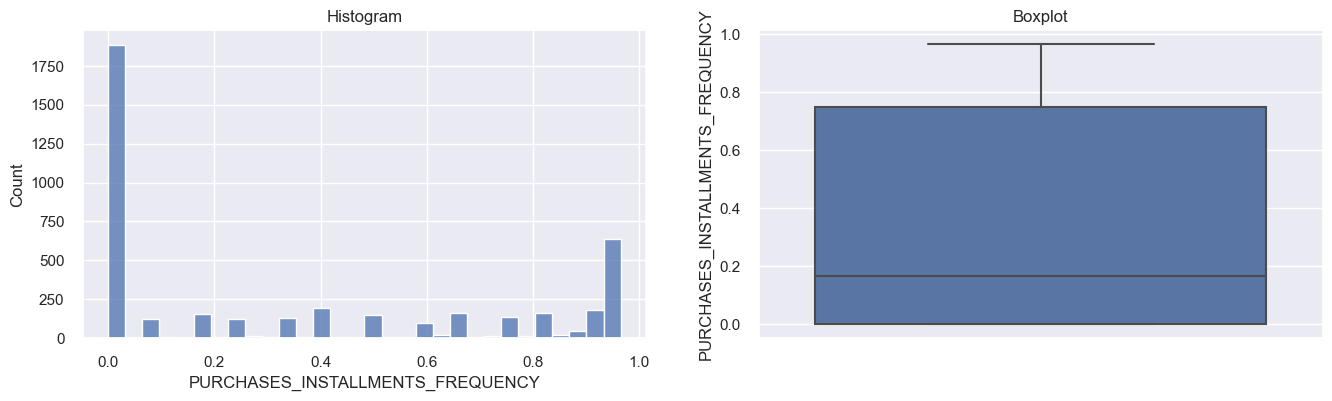

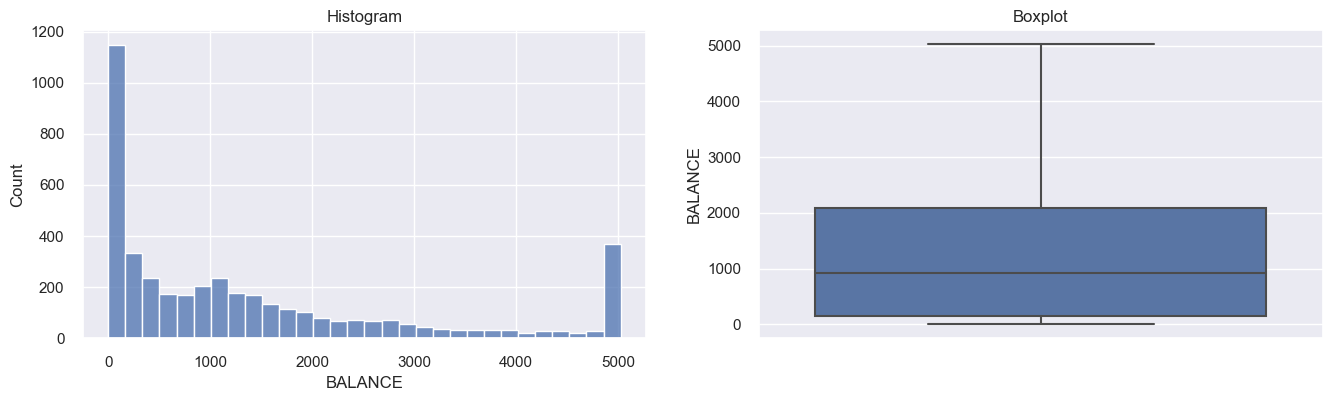

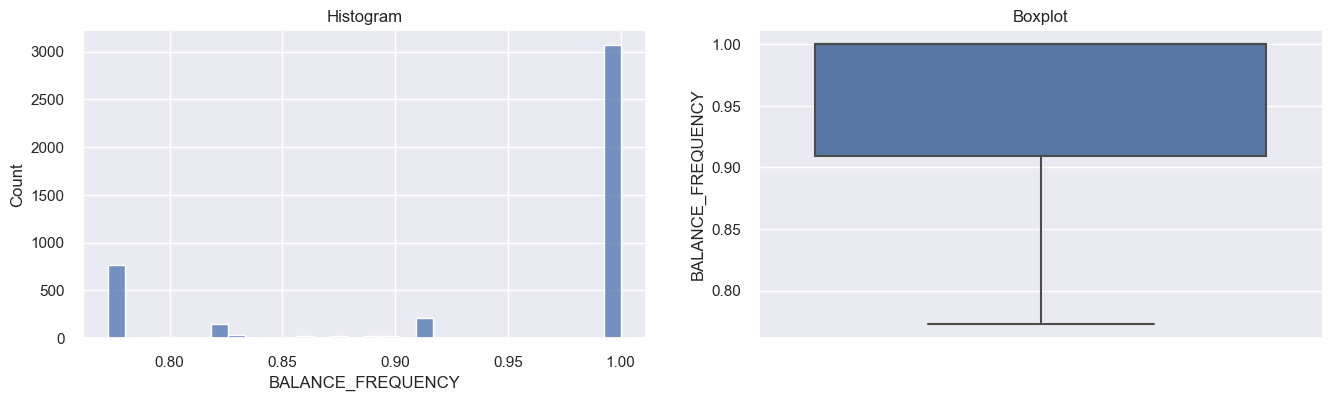

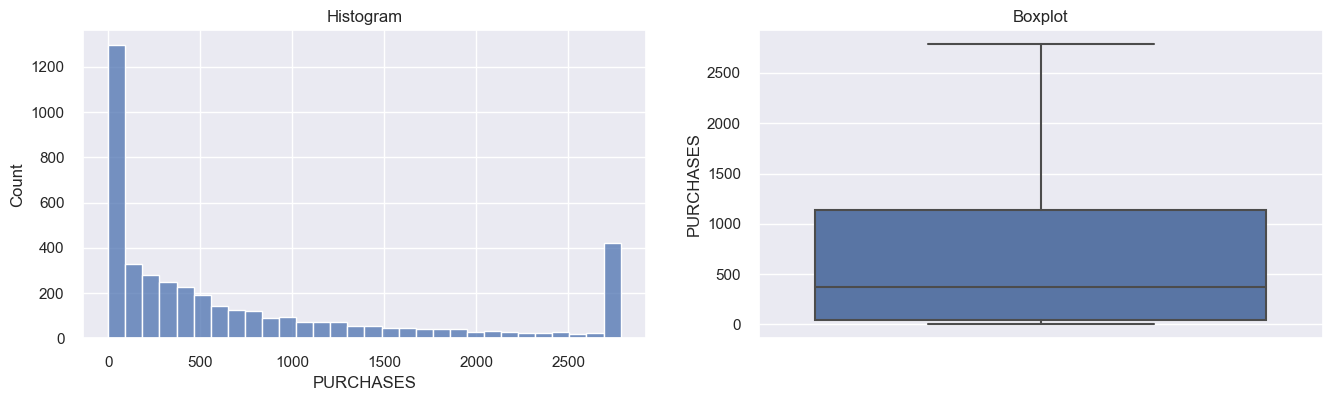

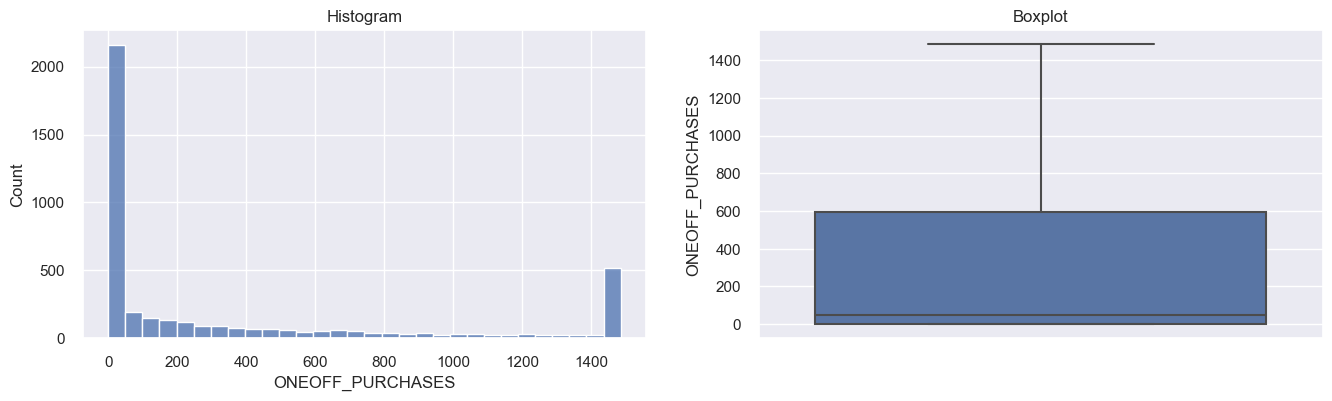

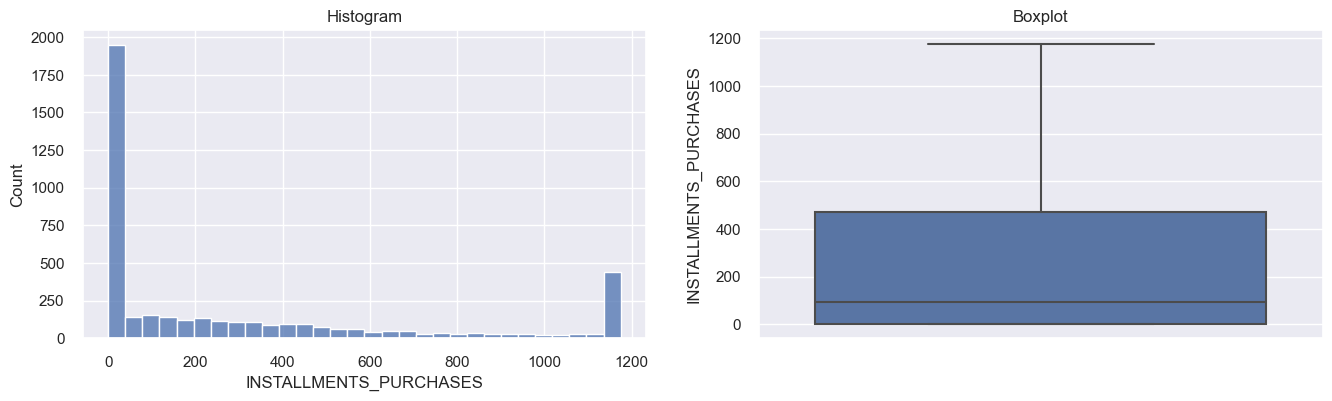

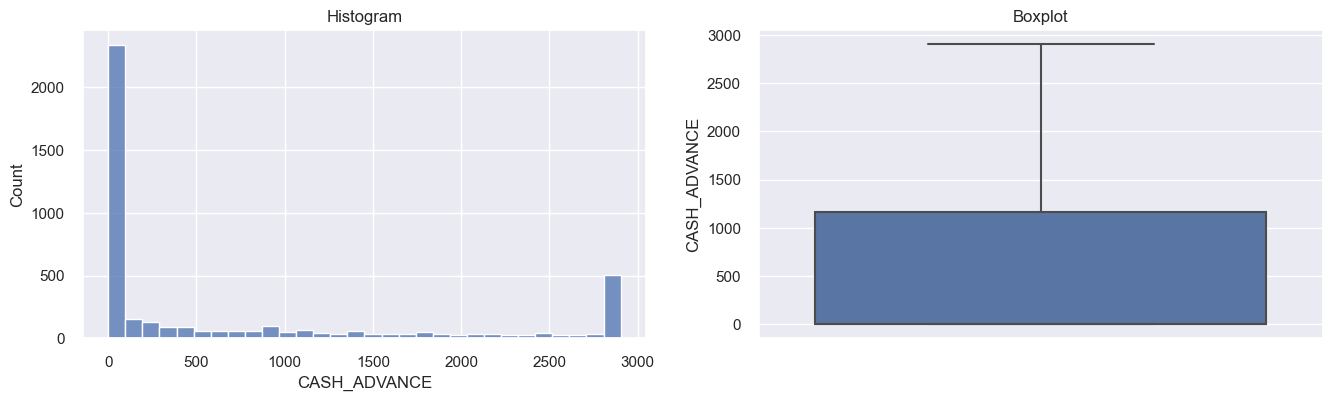

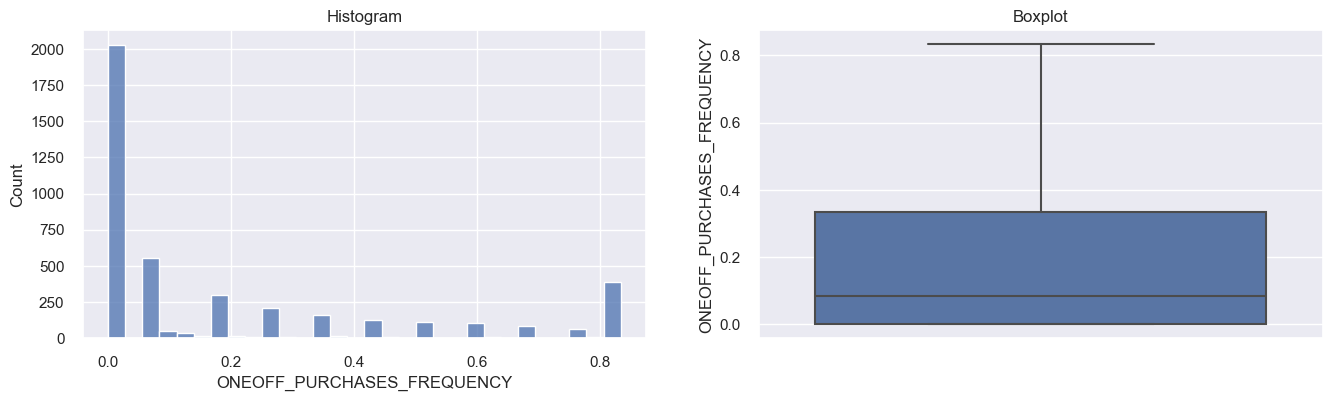

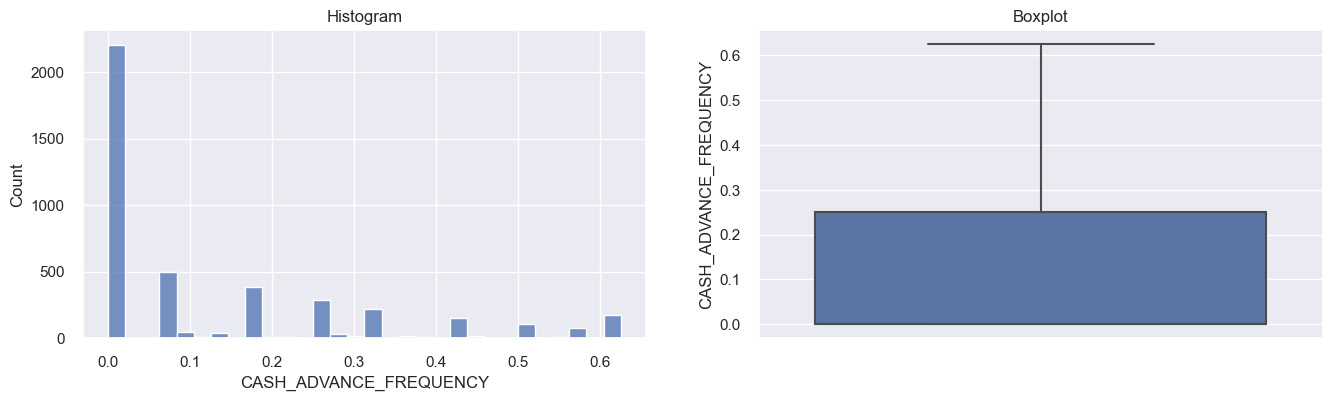

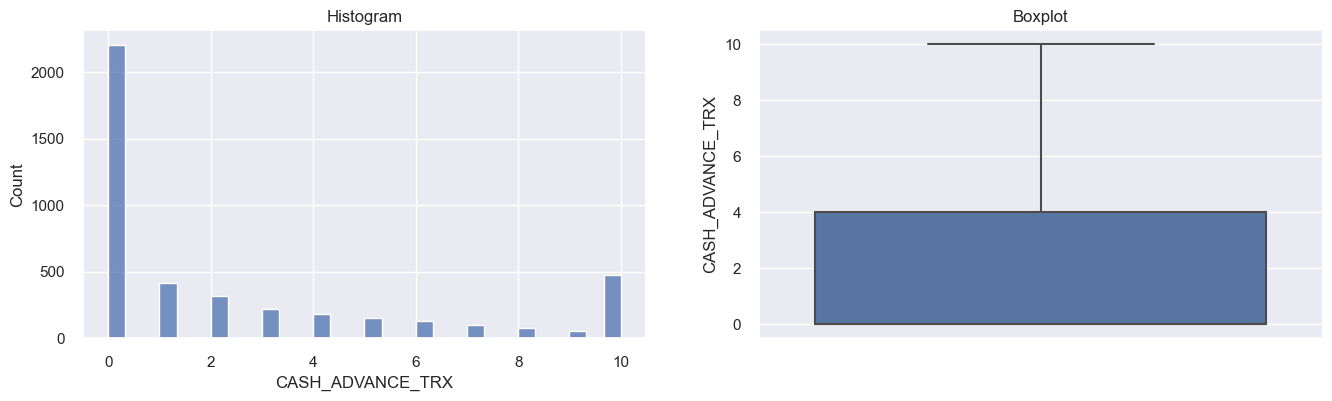

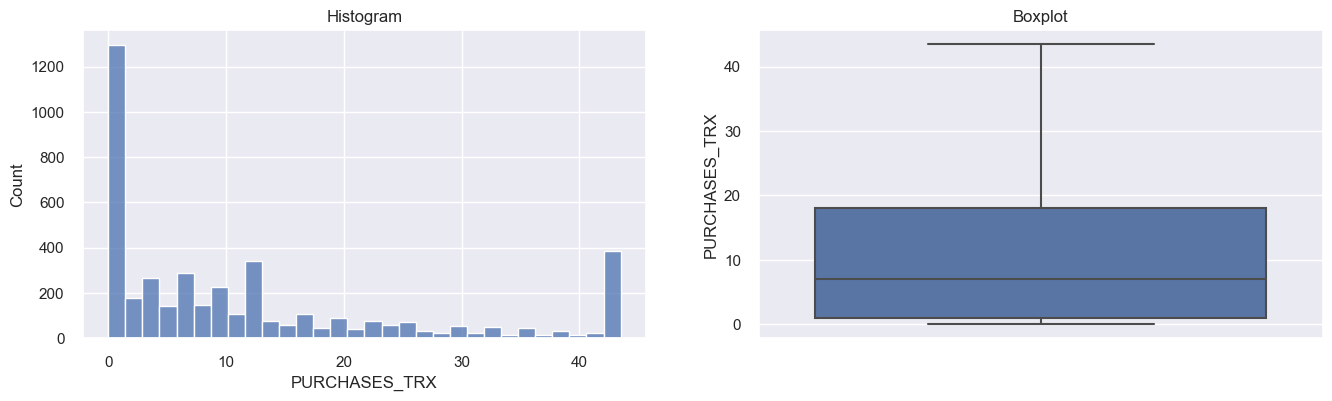

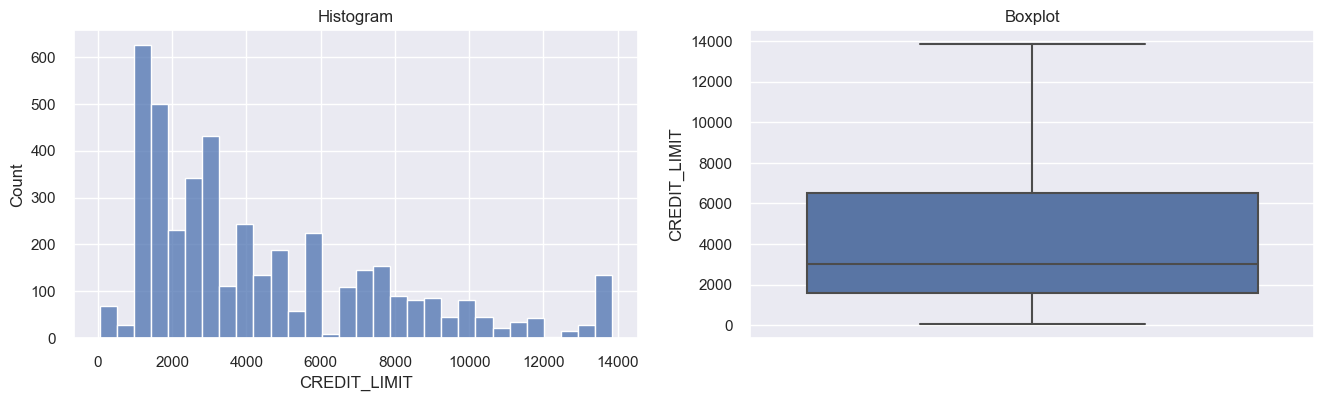

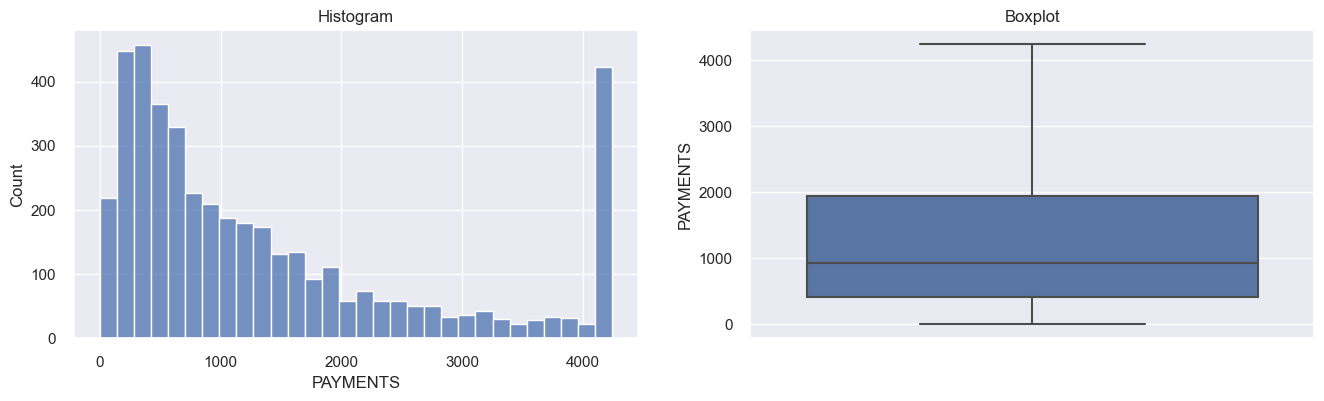

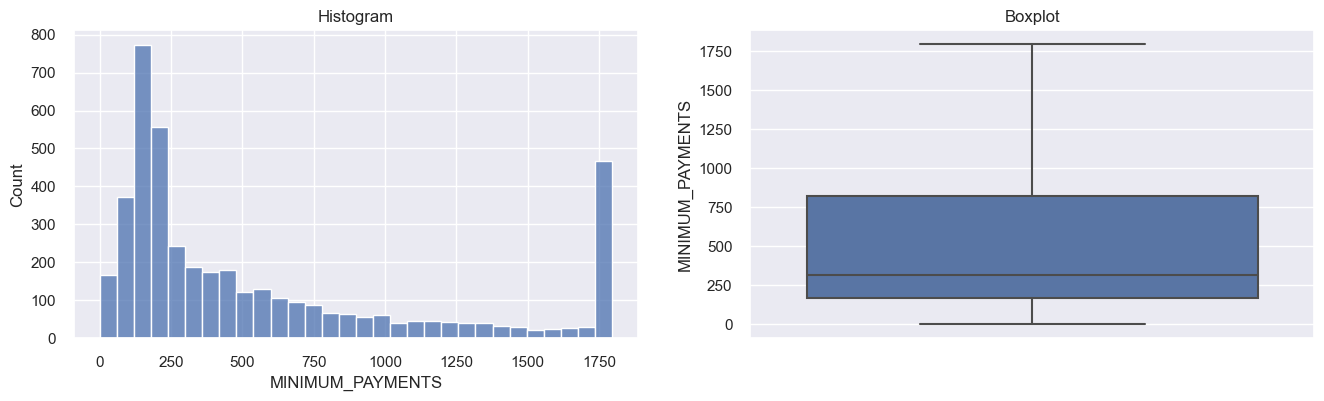

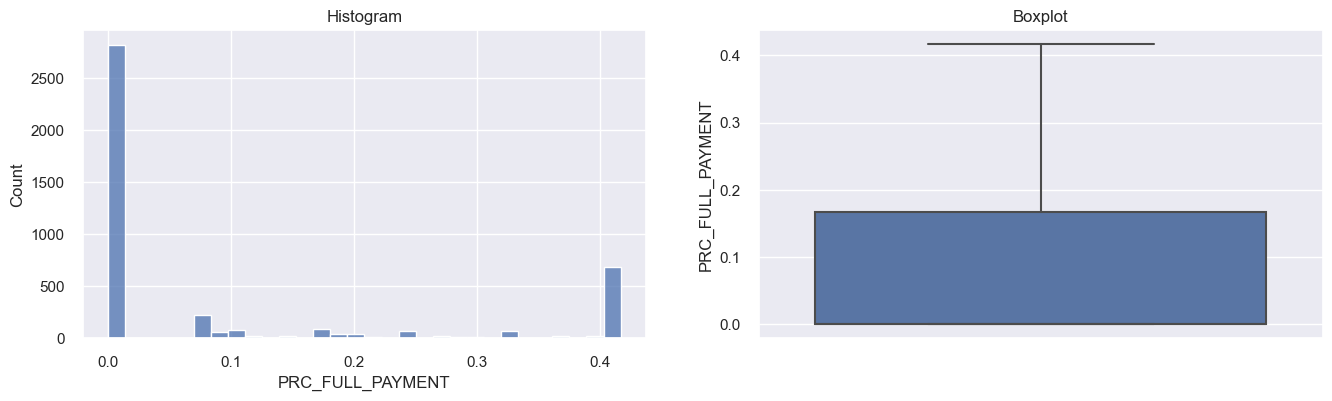

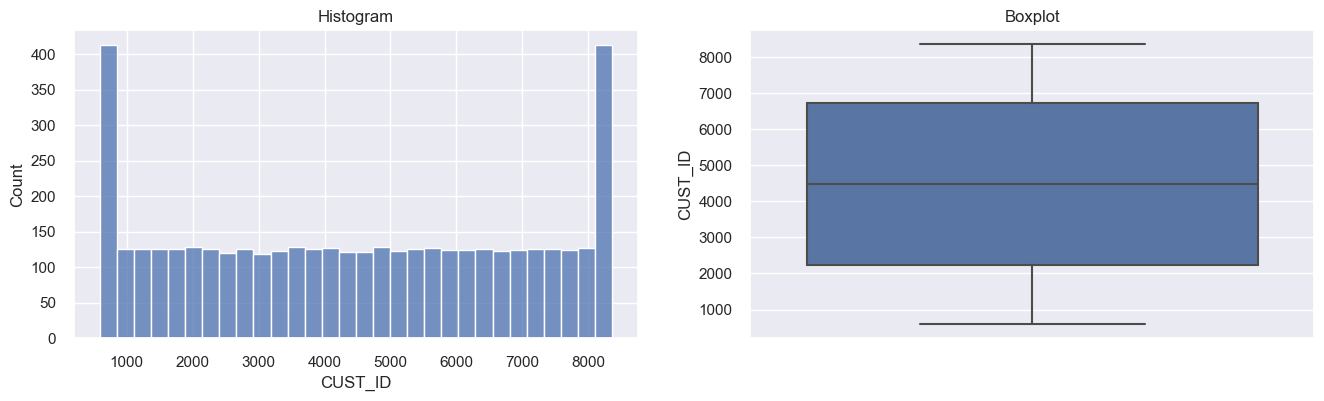

In [28]:
#Looping untuk visualisasi data sebelum dan sesudah dilakukannya capping
columns = ['PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
                                        'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 
                                        'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX','CREDIT_LIMIT', 
                                        'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','CUST_ID']

for i in columns:
    diagnostic_plots(df_capped, i)

Dari informasi di atas kita telah berhasil menghilangkan outlier dimana titik titik outlier sudah menghilang

Tahapan selanjutnya yaitu menghitung VIF Score untuk mengetahui adakah multicolinearity pada data untuk menghindari sensitivitas data serta overfiting dan underfiting data.

Cara pengecekannya : dengan menggunakan Variance Inflation Factor (VIF).

- VIF 1 adalah yang terbaik yang bisa Anda dapatkan karena ini menunjukkan bahwa tidak ada multikolinearitas untuk variabel ini.
- VIF yang lebih tinggi dari 5 atau 10 menunjukkan adanya multikolinearitas dalam model Anda.
- Selain itu, Anda dapat menggunakan pengetahuan domain untuk memeriksa korelasinya.

In [29]:
# Function unutk memanggil variable vif
def calc_vif(df_capped):
    vif = pd.DataFrame()
    vif["variables"] = df_capped.columns
    vif["VIF"] = [variance_inflation_factor(df_capped.values, i) for i in range(df_capped.shape[1])]

    return(vif)

In [30]:
# Check Multicolinearity in X
calc_vif(df_capped)

variables        VIF
0                            CUST_ID   4.099916
1                            BALANCE  10.314827
2                  BALANCE_FREQUENCY   9.815974
3                          PURCHASES  28.057723
4                   ONEOFF_PURCHASES  15.574452
5             INSTALLMENTS_PURCHASES  11.449799
6                       CASH_ADVANCE   5.418606
7                PURCHASES_FREQUENCY  27.540928
8         ONEOFF_PURCHASES_FREQUENCY   9.487061
9   PURCHASES_INSTALLMENTS_FREQUENCY  22.903014
10            CASH_ADVANCE_FREQUENCY  11.836346
11                  CASH_ADVANCE_TRX  13.055659
12                     PURCHASES_TRX  11.360114
13                      CREDIT_LIMIT   4.564229
14                          PAYMENTS   4.413421
15                  MINIMUM_PAYMENTS   7.750031
16                  PRC_FULL_PAYMENT   2.163239

Berdasarkan VIF score di atas kita dapat menarik hipotesis bahwa ada `13` kolom yang memiliki nilai di atas 5 dan juga di atas 10 itu mengindikasikan bahwa adanya multicolinearity sehingga sebagai asumsi atau hipotesis awal kita dapat mereduksi feature hingga `13` komponen atau kolom sehingga bisa dikatakan kita hanya butuh `4` feature saja untuk mendapatkan hasil yang optimal. Untuk membuktikan hipotesis yang sudah disebutkan dan mendapatkan hasil yang lebih akurat mari kita buktikan menggunakan `Reduction Data Using PCA`

---

# Bab 7: Model Definition

Untuk tahapan awal melakukan PCA kita harus menstandarisasi data kita dengan teknik scaling yaitu dengan teknik standard scaler

In [31]:
# Feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_capped)

In [32]:
# Reduction using PCA
pca = PCA()
numb_comp= pca.fit_transform(df_scaled)

Text(0, 0.5, 'Eigenvalues')

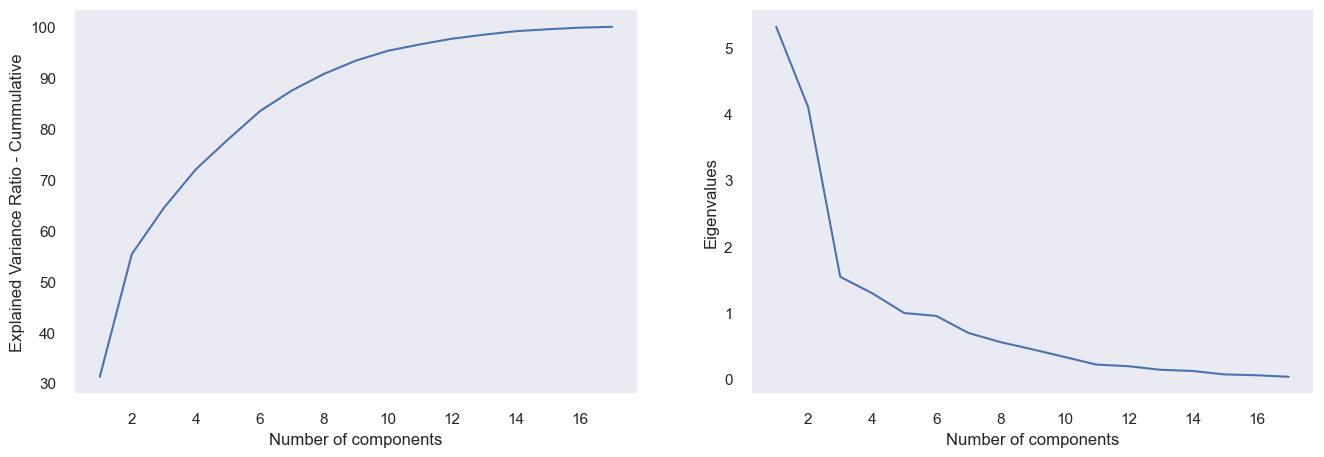

In [33]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 18), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 18), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [34]:
# Check harus memakai berapa kolom untuk mengkeep 95% informasi
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

10

Dari informasi di atas kita mendapatkan informasi bahwa untuk mengekeep data sebesar 95% kita hanya membutuhkan feature sebanyak `10` dimana dari feature yang sebanyak `17` direduksi sampai menjadi `10` itu artinya direduksi sebanyak `10` feature. Jadi inilah hasil yang akurat menggunakan `PCA` untuk mereduksi feature. Tahapan selanjutnya mari kita train model yang sudah kita pilih. 

---

# Bab 8: Model Training

In [35]:
# Melatih model dengan 95% informasi
pca = PCA(n_components=10)
pca.fit(df_scaled)

df_pca = pca.fit_transform(df_scaled)

Tahapan selanjutnya adalah kita akan mencari berapa cluster yang kita butuhkan berdasarkan data yang sudah melalui banyak analisis di atas

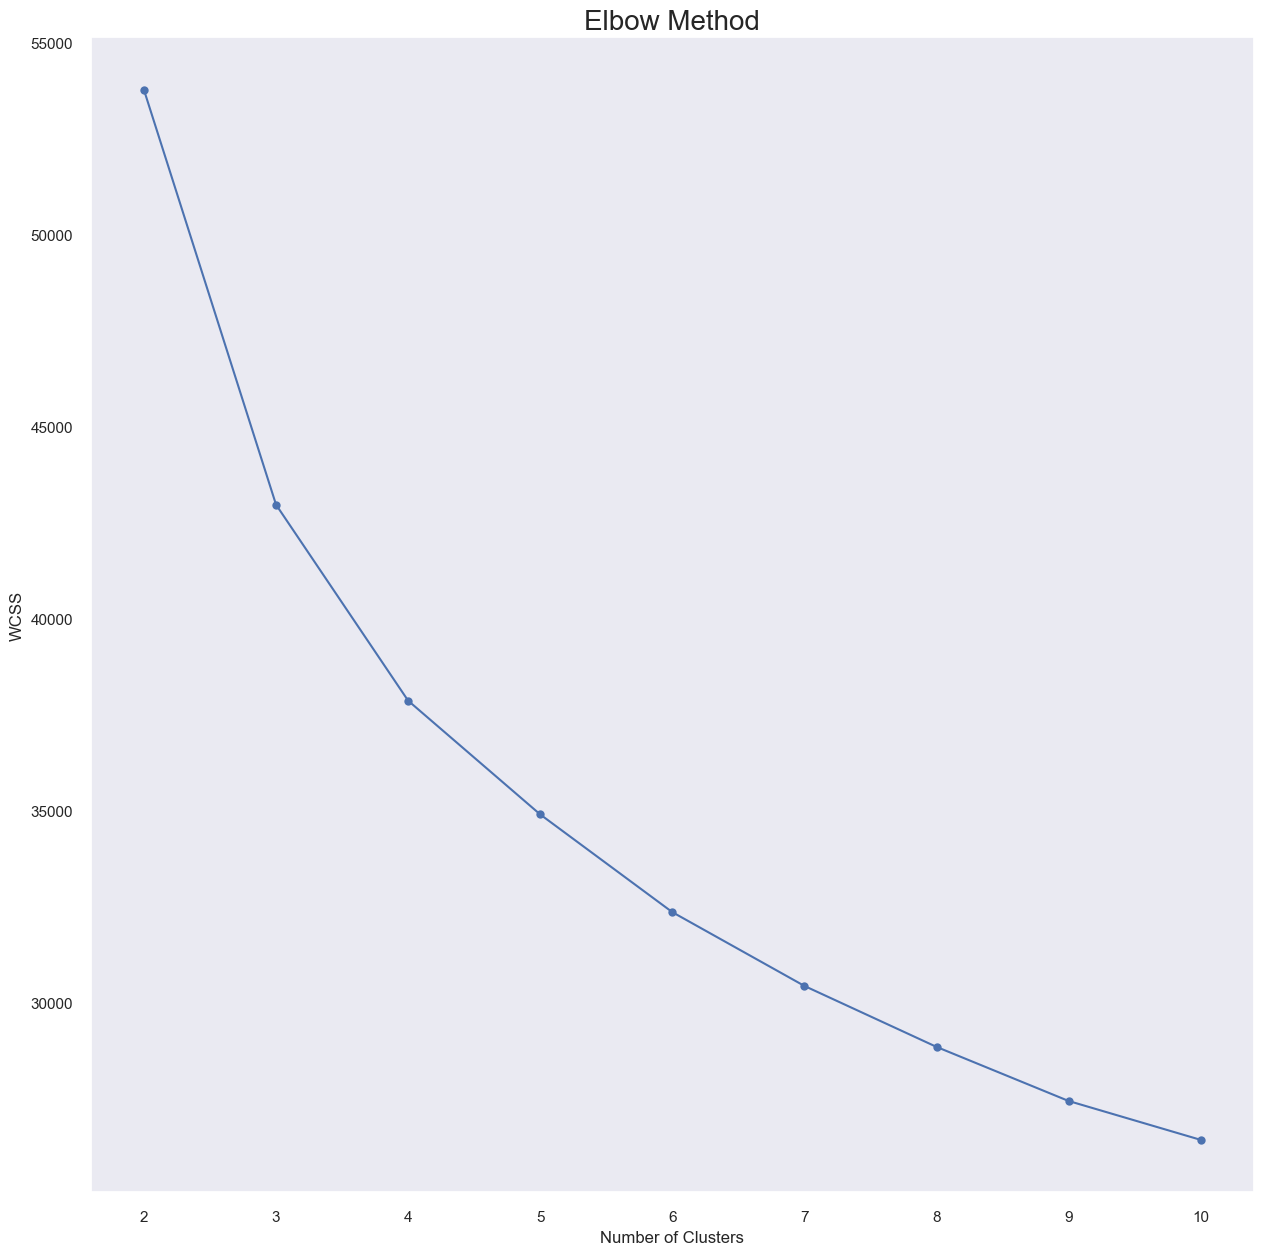

In [36]:
# Metode Elbow untuk mencari cluster teroptimal

wcss = []
random_state = 10
max_cluster = 10
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Dari gambar di atas kita bisa lihat nilai elbownya ada pada sekitar cluster nomer `4` untuk lebih akuratnya mari kita lihat menggunakan metode lain seperti di bawah

In [37]:
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        
        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters , init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.22689013133051636
For n_clusters = 3 The average silhouette_score is : 0.2344458409677366
For n_clusters = 4 The average silhouette_score is : 0.20157678676873203
For n_clusters = 5 The average silhouette_score is : 0.19306632166607915
For n_clusters = 6 The average silhouette_score is : 0.1973851608012771
For n_clusters = 7 The average silhouette_score is : 0.1975652872325754
For n_clusters = 8 The average silhouette_score is : 0.19169098381208005
For n_clusters = 9 The average silhouette_score is : 0.18776324589794843


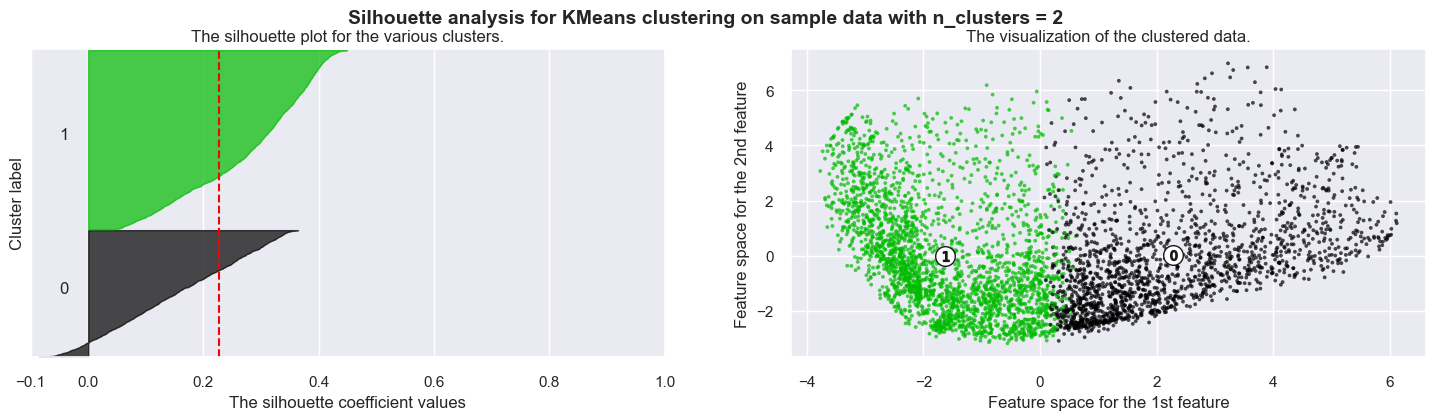

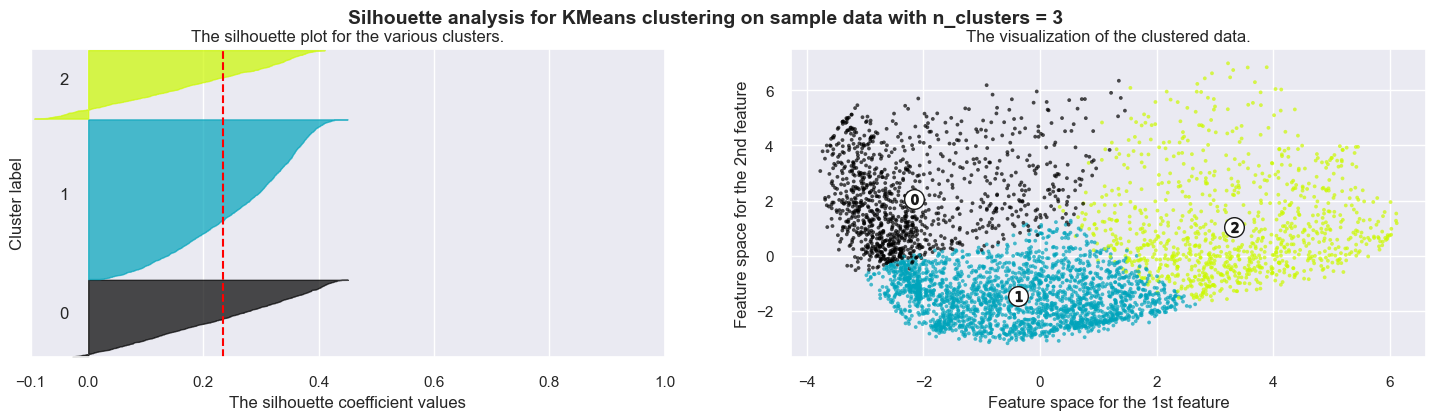

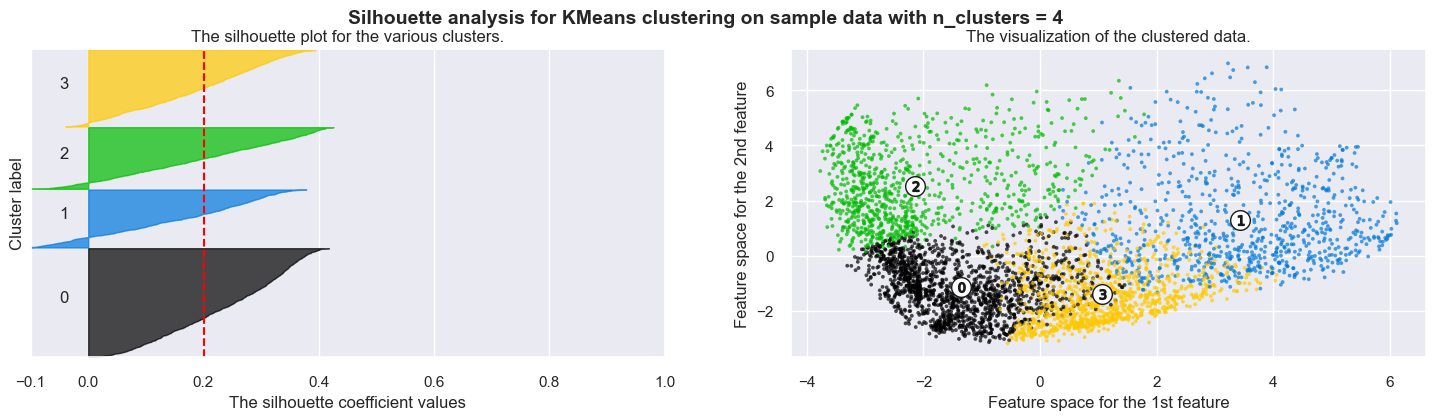

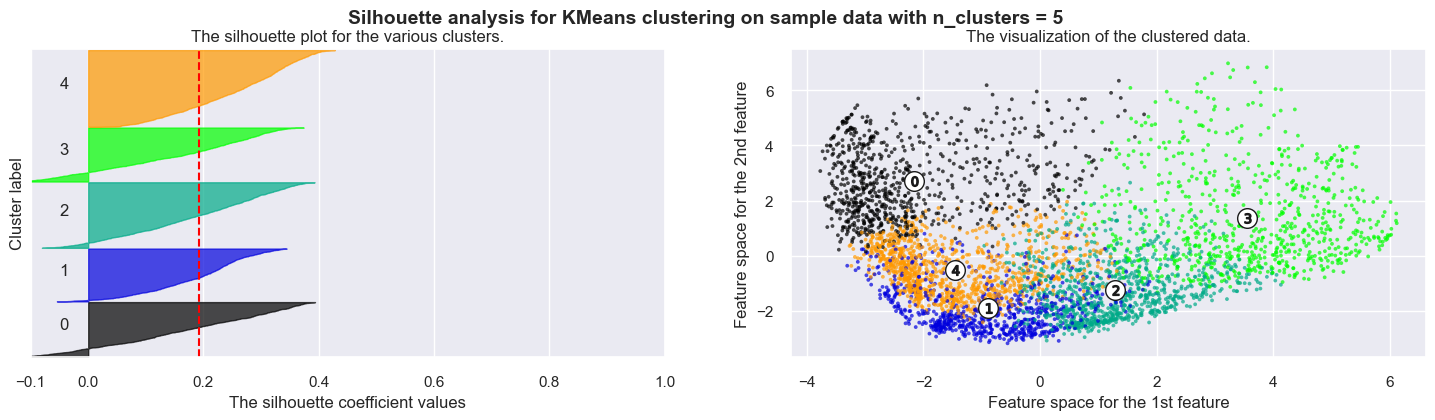

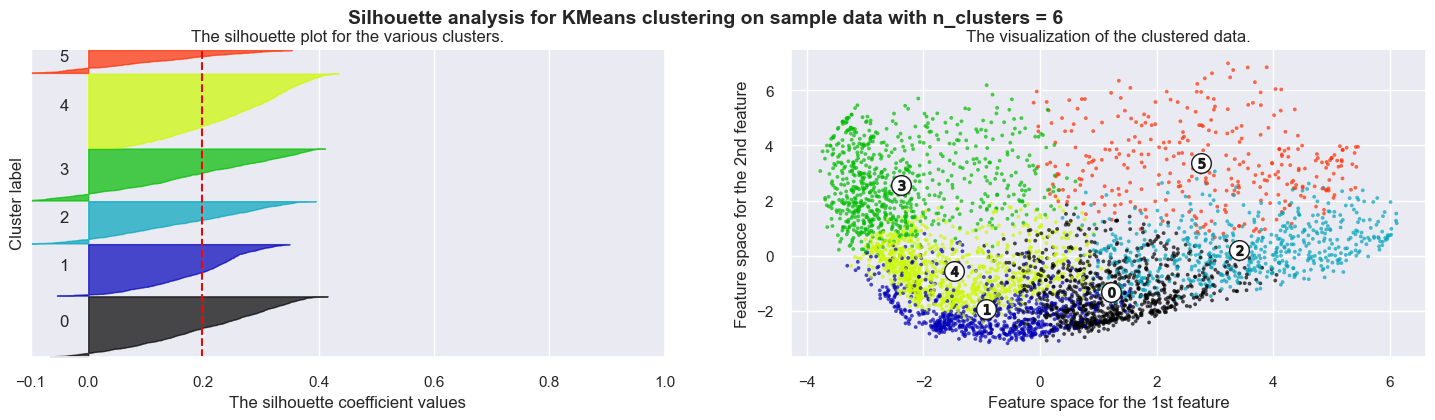

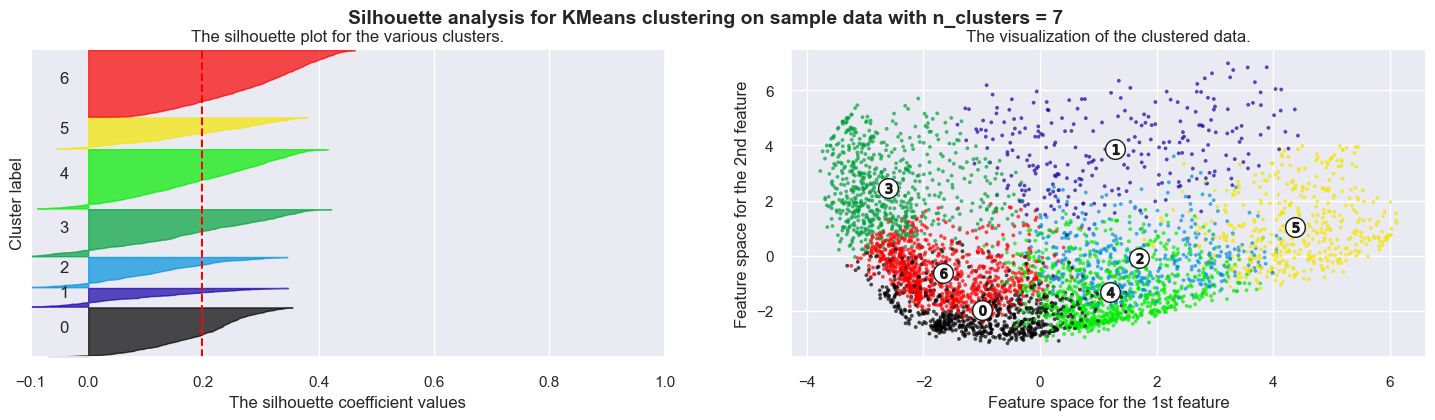

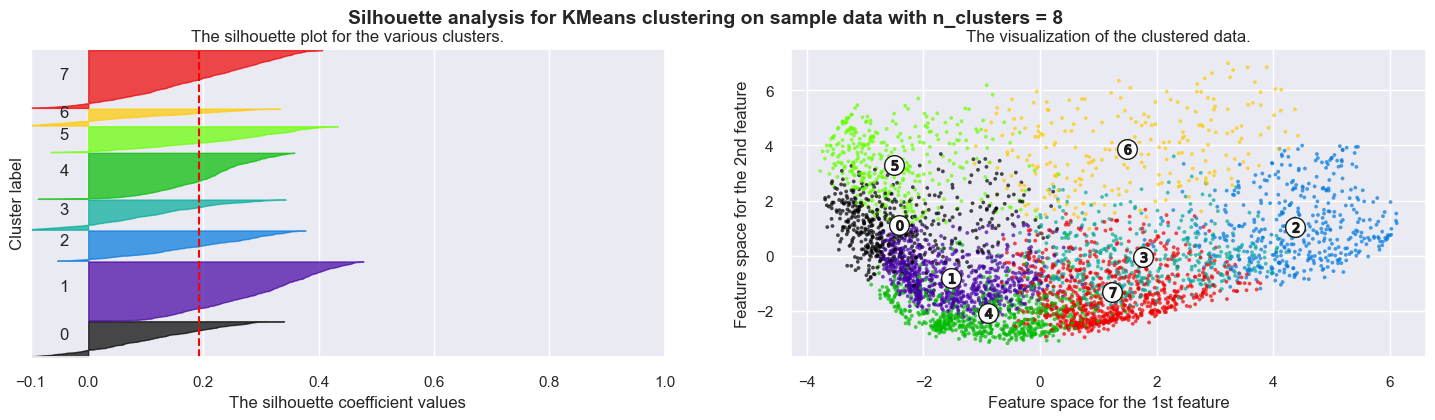

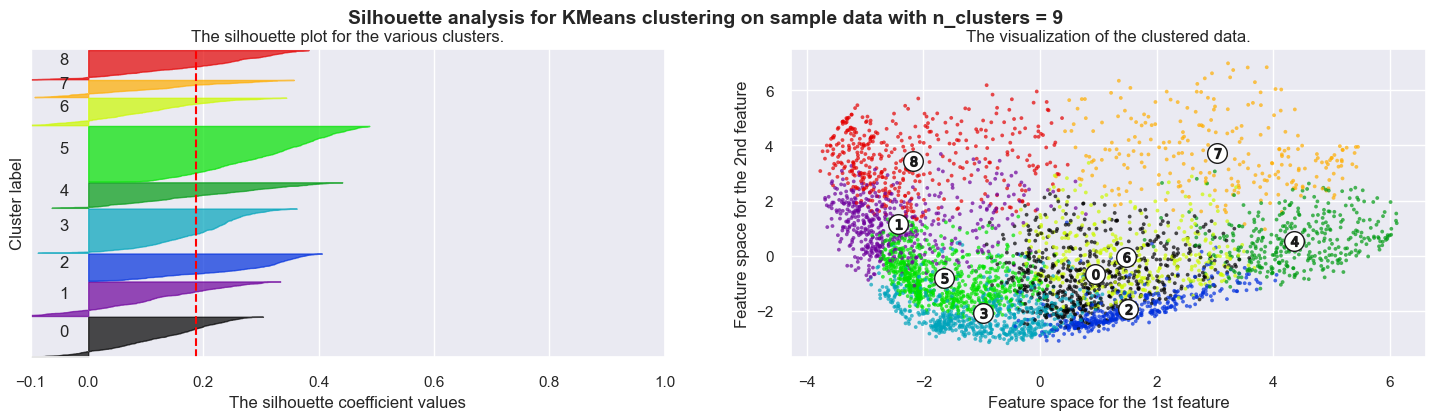

In [38]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), df_pca, random_state)

Dari Silhoutte score di atas cluster tertinggi ada pada jumlah cluster yaitu `3` untuk distribusi datanya memang terlihat paling rapi di antara semuanya dimana titik titik data dapat terbagi sama rata pada clusternya masing masing

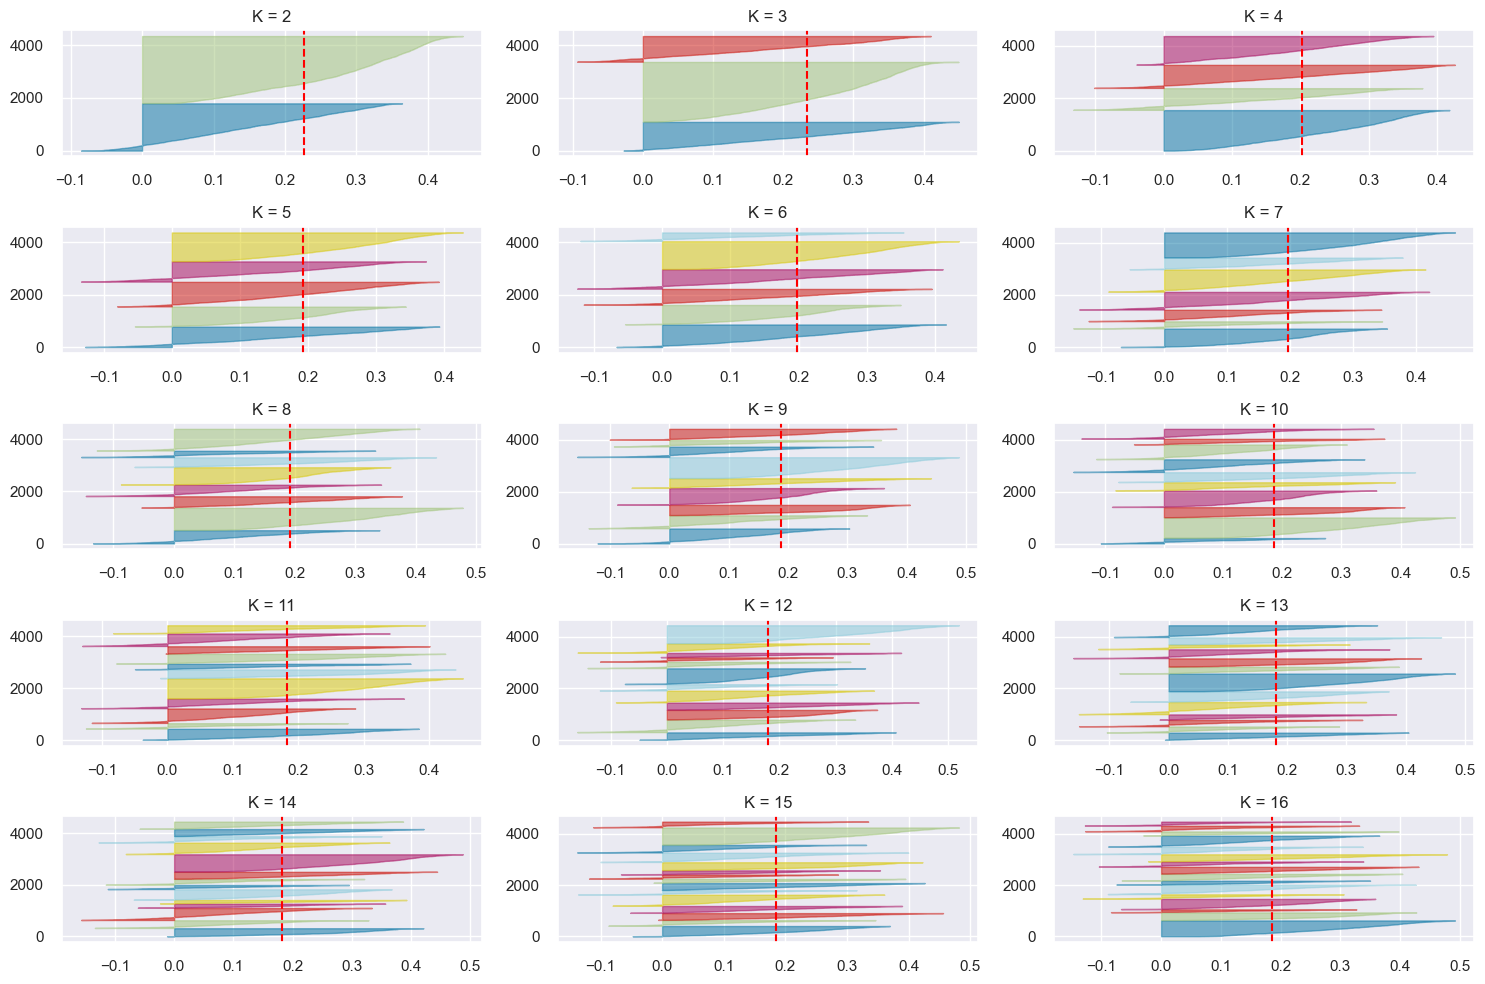

In [39]:
# Display the Silhouette Score and Plot Silhouette Plot
fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Loop for each plot
for i, ax in enumerate(axes.flatten()):

    # Initialize K-means clustering
    n_clusters = i + 2
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer to data
    visualizer.fit(df_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

kesimpulan dari Silhouette Score and Plot Silhouette Plot menunjukkan cluster yang memiliki score atau nilai tertinggi pada cluster `3` dimana dari segi persebaran datanya sudah cukup balance dan juga visualisasinya terlihat lebih fit. Sebelum masuk tahapan selanjutnya yaitu visualisasikan kembali pada `Exploratory Data Analyst jilid 2 (EDA 2)` kita akan membuat kolom baru dengan nama `cluster` untuk menguji model yang sudah kita buat dan mengklasifikasikan setiap data termasuk pada cluster mana saja.

In [40]:
# defined model Kmeans
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(df_pca)
pred

array([1, 1, 1, ..., 0, 0, 0])

In [41]:
# fit transform model
km.fit(df_pca)

KMeans(n_clusters=3, n_init=10, random_state=10)

In [42]:
# Insert clustering result into original dataset

df_capped['cluster'] = pred
df_capped

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  \
2     6075.000000   757.964752           0.875000      157.4   
3     6291.000000   264.566591           0.772728     1150.0   
4     7755.000000   440.613643           1.000000      600.0   
5     8299.000000   611.561026           1.000000      765.0   
7     8358.719905   105.333584           0.772728      306.0   
...           ...          ...                ...        ...   
4470  2345.000000  5024.810394           1.000000        0.0   
4471  6785.000000  1040.030221           1.000000        0.0   
4472  7347.000000  1322.818587           1.000000        0.0   
4473  8358.719905  1060.391273           1.000000        0.0   
4474  1995.000000  3447.674222           1.000000      205.0   

      ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
2                157.4                     0.0      0.000000   
3               1150.0                     0.0      0.000000   
4                600.0                     0.0      0.000000   
5                765.0                     0.0      0.000000   
7                306.0                     0.0      0.000000   
...                ...                     ...           ...   
4470               0.0                     0.0   2904.232221   
4471               0.0                     0.0   1390.648290   
4472               0.0                     0.0    762.301096   
4473               0.0                     0.0   1475.858013   
4474             205.0                     0.0   2904.232221   

      PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
2                0.125000                    0.125000   
3                0.125000                    0.125000   
4                0.125000                    0.125000   
5                0.125000                    0.125000   
7                0.125000                    0.125000   
...                   ...                         ...   
4470             0.000000                    0.000000   
4471             0.000000                    0.000000   
4472             0.000000                    0.000000   
4473             0.000000                    0.000000   
4474             0.090909                    0.090909   

      PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
2                                  0.0                0.000000   
3                                  0.0                0.000000   
4                                  0.0                0.000000   
5                                  0.0                0.000000   
7                                  0.0                0.000000   
...                                ...                     ...   
4470                               0.0                0.545455   
4471                               0.0                0.545455   
4472                               0.0                0.545455   
4473                               0.0                0.545455   
4474                               0.0                0.545455   

      CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
2                    0            6.0        1200.0  1494.480376   
3                    0            1.0        1200.0  3029.380326   
4                    0            1.0        1000.0   215.316424   
5                    0            1.0        2000.0   204.464151   
7                    0            2.0        6000.0   101.986927   
...                ...            ...           ...          ...   
4470                 9            0.0       12000.0  2468.988022   
4471                10            0.0        1400.0   290.129620   
4472                10            0.0        1500.0  1035.627320   
4473                10            0.0        2000.0   407.360560   
4474                 7            1.0       10500.0   665.239171   

      MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  cluster  
2          1795.542484               0.0        1  
3            85.428885               0.0        1  
4           137.84600

In [43]:
# Melihat jumlah nilai unik pada kolom cluster kita
cluster_counts= df_capped['cluster'].value_counts()
print(cluster_counts)

cluster
1    2261
0    1088
2     971
Name: count, dtype: int64


In [44]:
# Menghitung mean dari cluster terhadap kolom kolom yang ada
cluster_mean = df_capped.groupby('cluster').mean()
cluster_mean

CUST_ID      BALANCE  BALANCE_FREQUENCY    PURCHASES  \
cluster                                                             
0        4380.798446  2907.792284           0.966347   231.329237   
1        4539.811431   596.835894           0.919650   399.386621   
2        4435.170558  1729.986429           0.981463  2169.716952   

         ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
cluster                                                           
0              138.524731               82.022329   2032.984887   
1              176.627726              212.534690    188.286388   
2             1053.099315              740.588865    442.892897   

         PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
cluster                                                    
0                   0.193218                    0.082745   
1                   0.462826                    0.107618   
2                   0.913956                    0.526388   

         PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
cluster                                                             
0                                0.115454                0.360281   
1                                0.345656                0.047546   
2                                0.679141                0.076696   

         CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
cluster                                                               
0                6.833640       3.776195   5649.192291  1859.937971   
1                0.742592       7.555728   3072.914930   716.966182   
2                1.456231      32.184861   6308.135942  2489.439627   

         MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
cluster                                      
0             1010.858890          0.023386  
1              322.984445          0.114435  
2              683.001218          0.145131

Oke dari kedua informasi di atas kita dapat menyimpulkan bahwa:
- Cluster `0` = sebanyak `1088` orang
Adalah pengguna kartu kredit yang memiliki aktivitas transaksi yang mereka melakukan pembayaran cash yaitu pada colom`cash_advance` itu semua bisa dilihat dari kolom `balance` yang sangat tinggi. mereka melakukan pembayarannya tergolong tinggi bisa kita lihat pada kolom `payments` ini lah yang menyebabkan pengguna pada cluster ini memiliki tingkat credit limit yang tinggi kedua daripada cluster `2` sehingga hal ini bisa dikategorikan ke dalam `passive spender`

- Cluster `1` = sebannyak `2261` orang
Adalah cluster tertinggi dari pengguna kartu kredit dalam data dimana para penggunanya memiliki `balance` paling rendah juga `cash_advance` yang juga rendah namun memiliki tingkat `purcahses` yang tinggi mengindikasikan mreka sering melakukan transaksi menggunakan kartu kredit namun tidak melihat kemampuan untuk melakukan pembayaran terlihat dari kolom `payments` yang rendah sehingga instansi tidak dapat memberikan kepercayaan tinggi dengan memberikan `credit_limit` yang rendah kepada cluster ini. Dikategorikan sebagai `moderate spender`

- Cluster `2` = sebanyak `971` orang
Adadalah cluster yang memiliki `balance` lebih sedikit daripada `purchases` yang dilakukan sehingga dapat dikatakan bahwa cluster 2 ini sering sekali menggunakan kartu kreditnya namun dalam prosesnya mereka melakukan pembayaran cukup teratur dan tinggi terlihat dari kolom `payments` hal ini lah yang membuat instansi memberikan kepercayaan tinggi dengan memberikan `limit_credit` tertinggi daripada cluster yang lain dikarenakan banyak melakukan transaksi namun pembayaran juga seimbang walaupun dibarengi dengan pengunaan cash flow yang cuku tinggi juga dari kolom`cash_advance`. pengguna cluster ini dikategorikan sebagai `active spender`.


Tahapan selanjutnya mari kita visualisasikan data nya kedalam bentuk 2D pada EDA 2

---

# Bab 9: EDA 2

<Axes: >

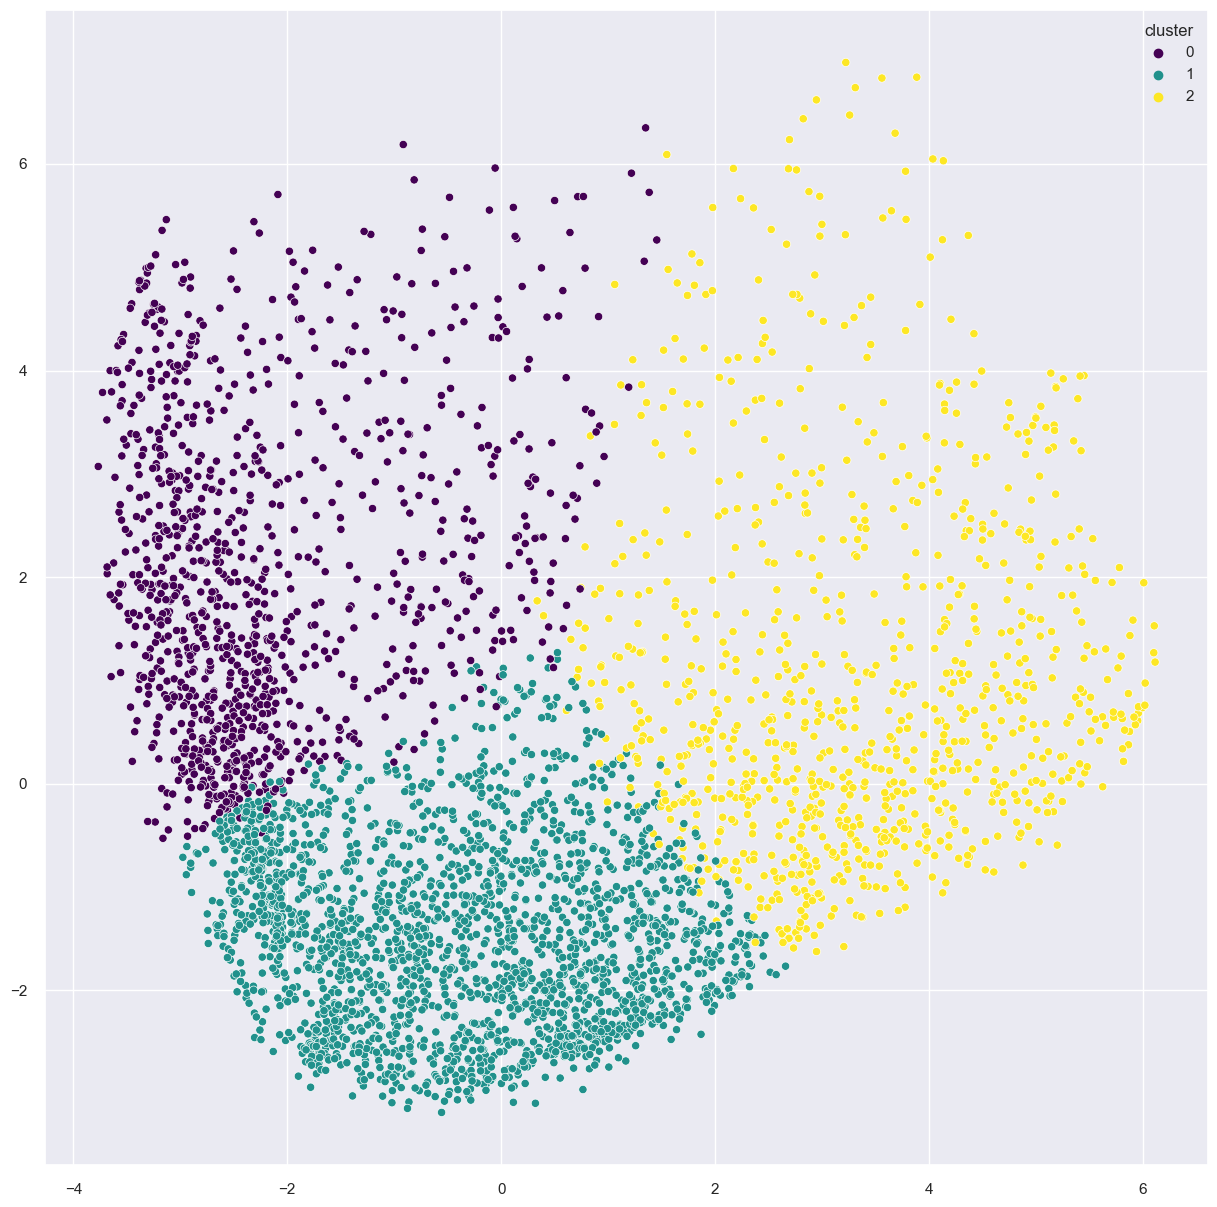

In [45]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
df_pca = pca_2d.fit_transform(df_scaled)

sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=df_capped['cluster'],palette='viridis')

In [46]:
def visualize(df_capped, labels):
    names =   [ "_".join(map(str, el)) for el in  zip(labels, df_capped.index)]

#     reducer = PCA(n_components=3, random_state=RS)
    reducer = TSNE(n_components=3, random_state=42)
#     reducer = umap.UMAP(n_components=3, random_state=RS)

    reduced_data = reducer.fit_transform(df_capped.values)
    
    
    black3dbg = dict(
            showbackground = True, 
            backgroundcolor ="rgb(10,10,10)", 
            gridcolor = "rgb(250, 250, 250)",  
            gridwidth=1.5,
            zeroline = False)
    
        
    fig = go.Figure(data=[go.Scatter3d(
        x=reduced_data[:, 0],
        y=reduced_data[:, 1],
        z=reduced_data[:, 2],
        mode='markers',
        
        
        text=names,
        
        marker=dict(
            size=12,
            color=labels,            
            colorscale='spectral', 
            opacity=0.8,
        )
    )])
    fig.update_layout(
#         showlegend=True,
        autosize=False,
        width=1000,
        height=1000)
    fig.update_scenes(xaxis=black3dbg, 
                      yaxis=black3dbg, 
                      zaxis=black3dbg, 
                      camera_eye=dict(x=1.75, y=1.75, z=1))
    fig.show()
visualize(df_capped, pred)

---

# Bab 10: Model Saving

In [47]:
# Menyimpan scaling
with open('model_scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)
# Menyimpan PCA
with open('model_pca.pkl', 'wb') as file_2:
  pickle.dump(pca, file_2)
# Menyimpan model K-Means
with open('km.pkl', 'wb') as file_3:
  pickle.dump(km, file_3)


---

# Bab 11: Model Inference

Model inferen ada pada notebook berjudul `model_inf_Allen`

# Bab 12: Kesimpulan

### Melihat EDA: 
- Limit Credit distribusi mengarah ke arah negatif yang dimaksudkan adalah persebarannya lebih rendah dimana dilihat dari data banyak pengguna yang memiliki statistik tidak berimbang antara `balance` dan juga `purchases` yang dilakukan serta `payments` yang rendah mempengaruhi `limit_credit`
### PCA,Elbow Method,Silhouette Score and Plot Silhouette Plot:
-  Reduksi feature akurat oleh PCA maximal 10 feature untuk mendapatkan atau keep informasi sebanyak 95%
-  Berdasarkan bantuan PCA, kita mendapatkan hasil elbow method dengan cluster optimal ada pada angka `4`
-  Berdasarkan Silhouette Score and Plot Silhouette Plot cluster optimal pada angka `3` karena dilihat dari distribusi titik data nya tercluster secara merata dan memiliki score paling tinggi sehingga pada model learning kali ini kita memilih cluster 3
- Didapatkan data yang terbagi menjadi 3 cluster yaitu passsive spender, moderate spender, dan juga active spender
### Classification Cluster:
- Terdapat beberapa insight data dari segi aktivitas penggunaan kartu credit oleh customer yang bisa dijadikan referensi bagi marketing perusahaan berdasarkan 3 cluster 
    - Cluster `0` = sebanyak `1088` orang
    Adalah pengguna kartu kredit yang memiliki aktivitas transaksi yang mereka melakukan pembayaran cash yaitu pada colom`cash_advance` itu semua bisa dilihat dari kolom `balance` yang sangat tinggi. mereka melakukan pembayarannya tergolong tinggi bisa kita lihat pada kolom `payments` ini lah yang menyebabkan pengguna pada cluster ini memiliki tingkat credit limit yang tinggi kedua daripada cluster `2` sehingga hal ini bisa dikategorikan ke dalam `passive spender`

    - Cluster `1` = sebannyak `2261` orang
    Adalah cluster tertinggi dari pengguna kartu kredit dalam data dimana para penggunanya memiliki `balance` paling rendah juga `cash_advance` yang juga rendah namun memiliki tingkat `purcahses` yang tinggi mengindikasikan mreka sering melakukan transaksi menggunakan kartu kredit namun tidak melihat kemampuan untuk melakukan pembayaran terlihat dari kolom `payments` yang rendah sehingga instansi tidak dapat memberikan kepercayaan tinggi dengan memberikan `credit_limit` yang rendah kepada cluster ini. Dikategorikan sebagai `moderate spender`

    - Cluster `2` = sebanyak `971` orang
    Adalah cluster yang memiliki `balance` lebih sedikit daripada `purchases` yang dilakukan sehingga dapat dikatakan bahwa cluster 2 ini sering sekali menggunakan kartu kreditnya namun dalam prosesnya mereka melakukan pembayaran cukup teratur dan tinggi terlihat dari kolom `payments` hal ini lah yang membuat instansi memberikan kepercayaan tinggi dengan memberikan `limit_credit` tertinggi daripada cluster yang lain dikarenakan banyak melakukan transaksi namun pembayaran juga seimbang walaupun dibarengi dengan pengunaan cash 
    flow yang cuku tinggi juga dari kolom`cash_advance`. pengguna cluster ini dikategorikan sebagai `active spender`.
### Insight Business    
- Berdasarkan model inference model ini sudah siap digunakan untuk business insight pada perbankan untuk mendeteksi suatu nasabah atau pengguna kartu kredit dalam cluster yang mana berdasarkan aktivitas kartu kredit customer yang telah disebutkan di atas sehingga memudahkan untuk efisiensi waktu bagi perbankan atau instansi yang serupa untuk mendeteksi pengguna baru mungkin yang sedang akan mendaftarkan diri sehingga dapat menyusun strategi marketing dan juga mengantisipasi hal-hal apa saja yang mungkin akan terjadi kedepannya.
### Improvement Untuk Model Berikutnya:
- Berdasarkan apa yang sudah saya kerjakan melihat aktivitas customer yang pasti dinamis dan berubah-ubah perlu adanya updating data sebelum model digunakan
- Menambahkan data kolom baru atau feature tambahan dimungkinkan sekali untuk menambah insight business dan memperluas clusterisasi

## Pertanyaan:

- Apakah yang dimaksud dengan inertia pada algoritma K-Means ?
- Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) 

---

## Jawaban:

1. Innertia adalah suatu metric yang digunakan pada K-means yang sering di artikan sebagai jumlah kuadrat jarak antar titik data dalam kluster terhadap centroid, sehingga tujuan utama clustering menggunakan metode K-means untuk mengurangi inertia agar kumpulan titik data dapat menjadi data yang compact 
2. - Elbow method adalah sebuah cara atau metode untuk kita dapat menentukan optimal cluster atau nilai K, pada metode elbow sendiri biasanya nilai cluster optimal ada pada grafiknya yang berbentuk siku dimana diambil dari kata `elbow` yang berarti siku.
    - kelebihan:
    1. kelebihannya adalah nilai K atau cluster bersifat fleksibel dan tidak saklek 
    2. Untuk visualiasasinya sederhana dan mudah dipahami
    - kekurangan:
    1. Terkadang grafiknya landai sehingga sulit untuk menentukan nilai optimal jadi kita harus menentukan sendiri K yang sekiranya optimal dan ada pada siku grafik
    2. karna grafik terkadang landai jadi metode ini harus disempurnakan lagi dengan metode lain yang 
    